<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Navigation<a id="topNav"></a>
#### 1. [Step 1: Load and Explore the Data ](#1)
- 1.1. [Step 1.1: Exploratory Data Analysis (EDA)](#1.1)

#### 2. [Step 2: Data Wrangling on multiple tables](#2)

#### 3. [Step 3: Data Cleansing and Transformation](#3)
- 3.1. [Step 3.1: Outliers Removal/ Capping](#3.1)
- 3.2. [Step 3.2: Train and Test Split](#3.2)
- 3.3. [Step 3.3: Missing Value Imputation](#3.3)
- 3.4. [Step 3.4: Categorical Data Encoding](#3.4)
- 3.5. [Step 3.5: Numerical Data Transformation](#3.5)
- 3.6. [Step 3.6: Variable Binning/ Discretization](#3.6)
- 3.7. [Step 3.7: Feature Scaling](#3.7)
- 3.8. [Step 3.8: Features Computation](#3.8)

#### 4. [Step 4: Machine Learning Modelling](#4)

#### 5. [Report](#5)

In [1]:
# import the packages

import numpy as np
import pandas as pd
import datetime

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PolynomialFeatures

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder, CountFrequencyEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser, ArbitraryDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import LogTransformer, ReciprocalTransformer, PowerTransformer, BoxCoxTransformer, YeoJohnsonTransformer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer, ArbitraryNumberImputer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load and Explore the Data <a id="1"></a>
[Back to Navigation](#topNav)

In [2]:
# Our target variable is 'milliseconds' in lap_times to predict the lap time of all drivers in upcoming races
# We will then be creating a calculated feature to make our target variable to be in seconds and named 'lapTime'
# Datasets to be used: lap_times, drivers, races, circuits
# Loading the datasets

path = './f1db_csv_mod/'

lap_times_df = pd.read_csv(path + 'lap_times_mod.csv')

drivers_df = pd.read_csv(path + 'drivers_mod.csv')

races_df = pd.read_csv(path + 'races_mod.csv')

circuits_df = pd.read_csv(path + 'circuits_mod.csv')

In [3]:
# Let us get a quick overview of the loaded datasets
lap_times_df.head()

raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342

In [4]:
drivers_df.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [5]:
races_df.head()

raceId  round  circuitId                   name       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1       2      2          2   Malaysian Grand Prix  4/5/12009   9:00:00   
2       3      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
3       4      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
4       5      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [6]:
circuits_df.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

### Step 1.1: Exploratory Data Analysis <a id="1.1"></a>
[Back to Navigation](#topNav)

In this part, we will be exploring the loaded datasets in TIBCO Spotfire Analyst to identify any trends or relationships formed. By identifying the important features which forms a relationship with the target variable, this will help us remove the other unncessary features which will improve the processing speed of the machine learning model in the later part. 

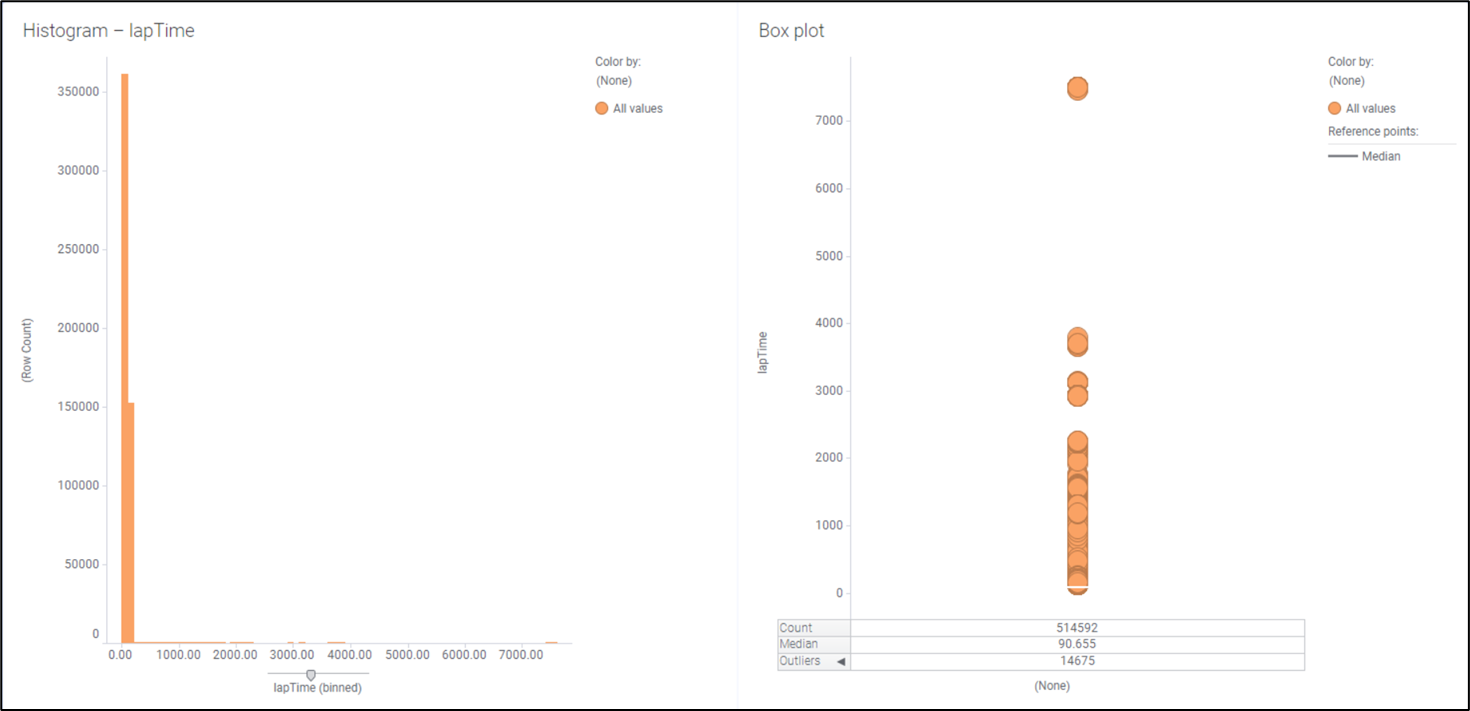

In this two visualization, on the left we have a histogram to show the distribution of our target variable, and on the right we have a boxplot which shows the outliers present in our target variable. From the histogram, we see that there are some outliers already present in the target variable, with most of our data being less than 500. From the boxplot, we see that there are alot of outliers presenet with the visual being unable to see the actual boxplot, showing that the upper range of the target variable is very high. With the outlier count of 14675, we should try to identify whether the outliers are keyed in wrong.

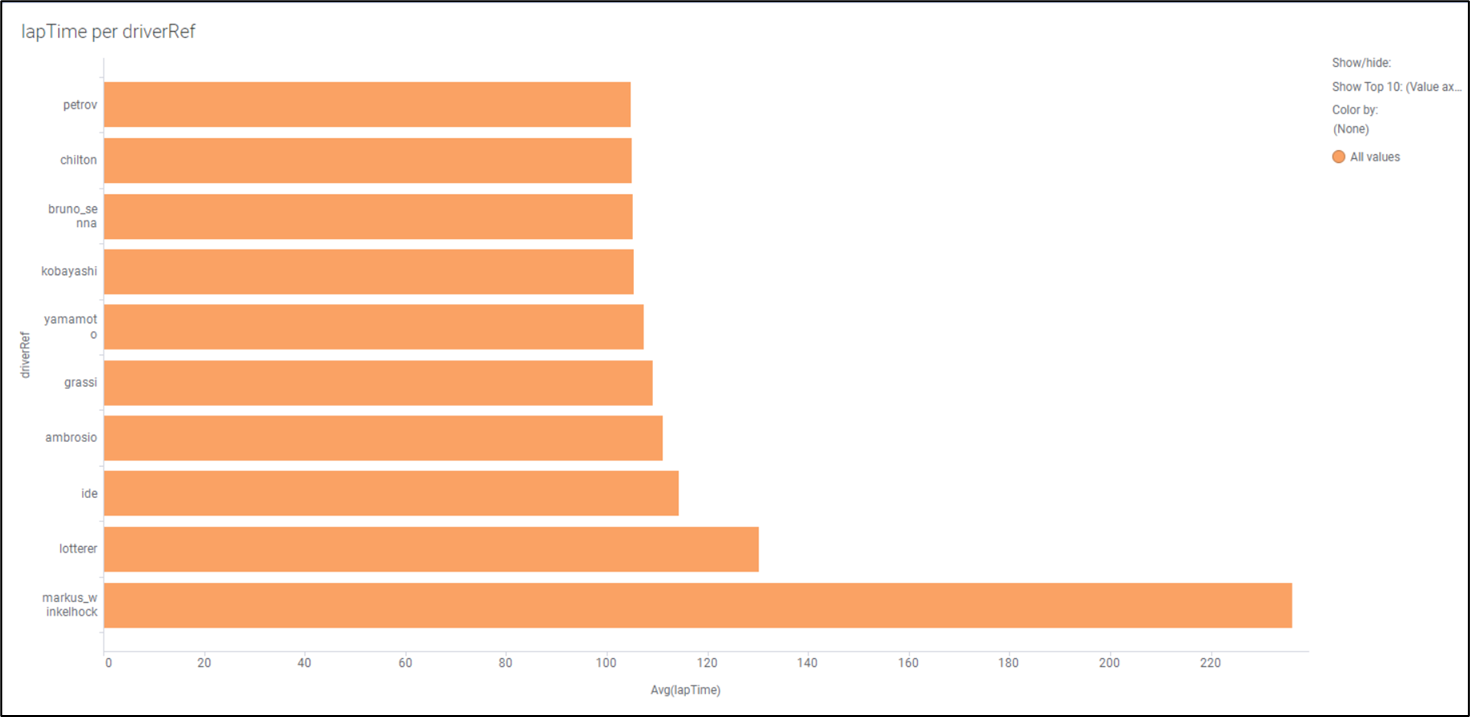

In this visual, we plot a bar chart of the f1 driver by their average lap time. By using the average lap time, it will help give us a better understanding of the mean instead of having large amount of data points scattered throughout the visual. Looking at the bar chart, we ranked the top 10 drivers by their average lap time. This tells us how a driver will affect our target variable, lap time, since some drivers are bad and some are skilled, which affects their lap times.

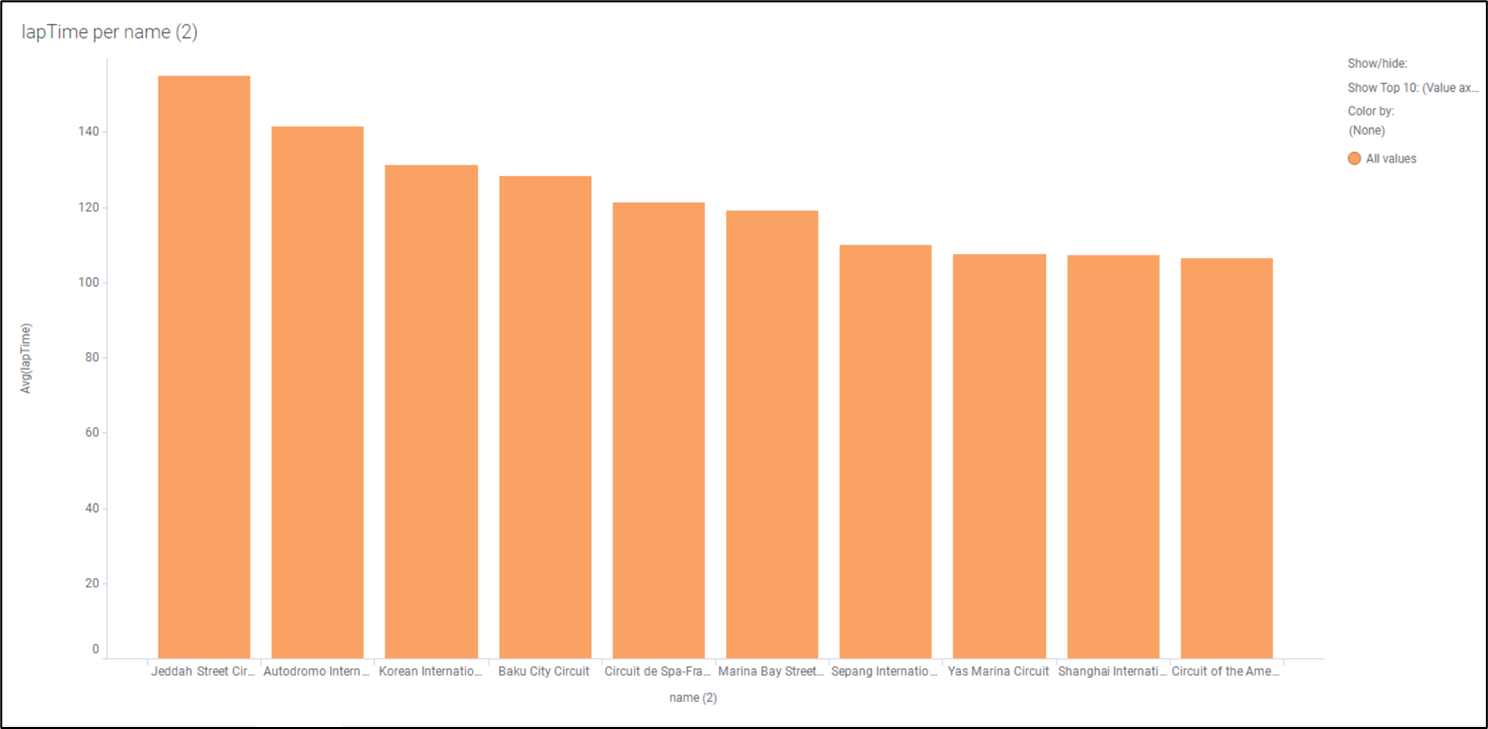

In this visual, we plot a column chart of the circuit names by the average lap time to tell us whether a certain. circuit causes a higher lap time than the others vice versa. From this column chart, we see that Jeddah Street Circuit has one of the highest lap times, this is due to the Jeddah Street Circuit being 6.175km and being one of the longest circuit in the Saudi Arabian Grand Prix. Hence, the use of the circuit name will give us an indication of the difficulty of the circuit due to the lap times, which will be a useful feature for our predictive model.

Ref: https://www.formula1.com/en/latest/article.the-circuit-the-challenge-and-the-culture-how-jeddah-is-shaping-up-for-the.6nm5W4zEpXtCKsA3VQBkgb.html

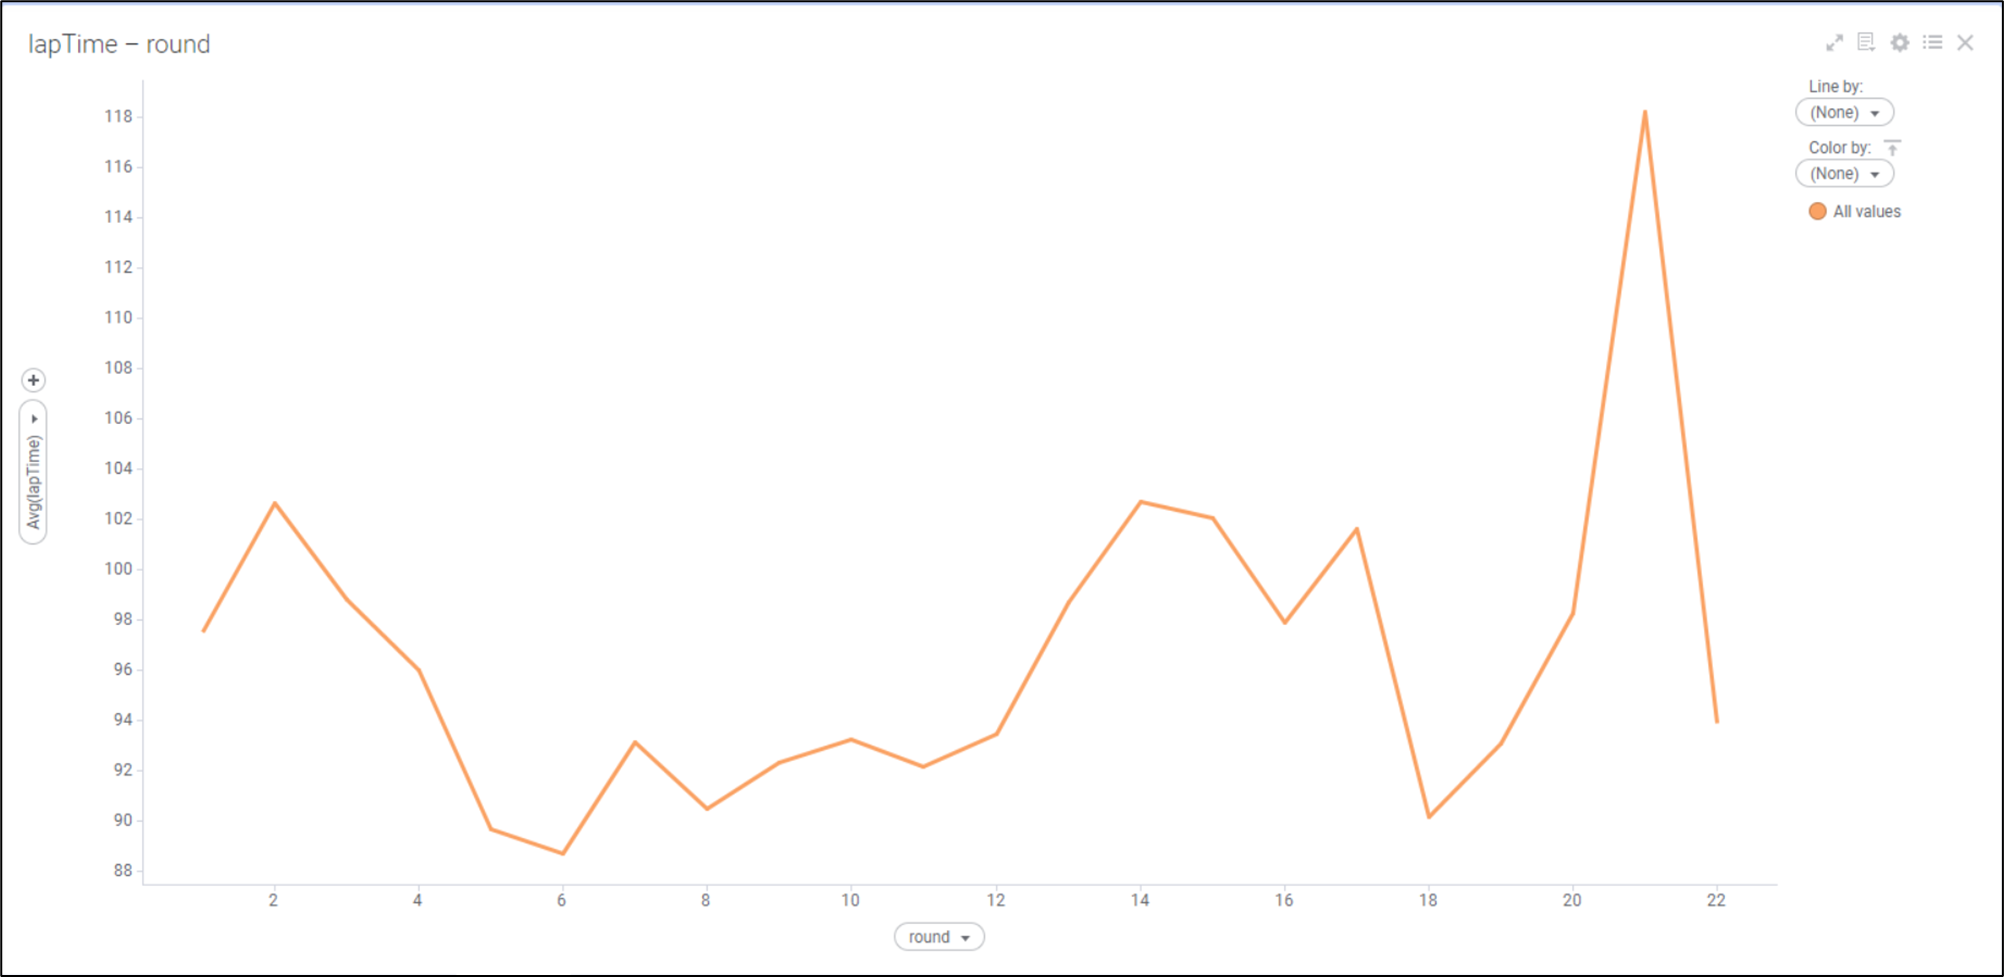

This visual uses a line chart of the round of the grand prix and the average lap time. In this visual, we see that there is a pattern where there are a period of rounds such as he early rounds having a longer average lap time. Moreover, at the last round, we see that the average lap time drop alot from the second last round. Hence, we can tell that certain rounds affect the average lap time where will use these feature for our final machine learning model.

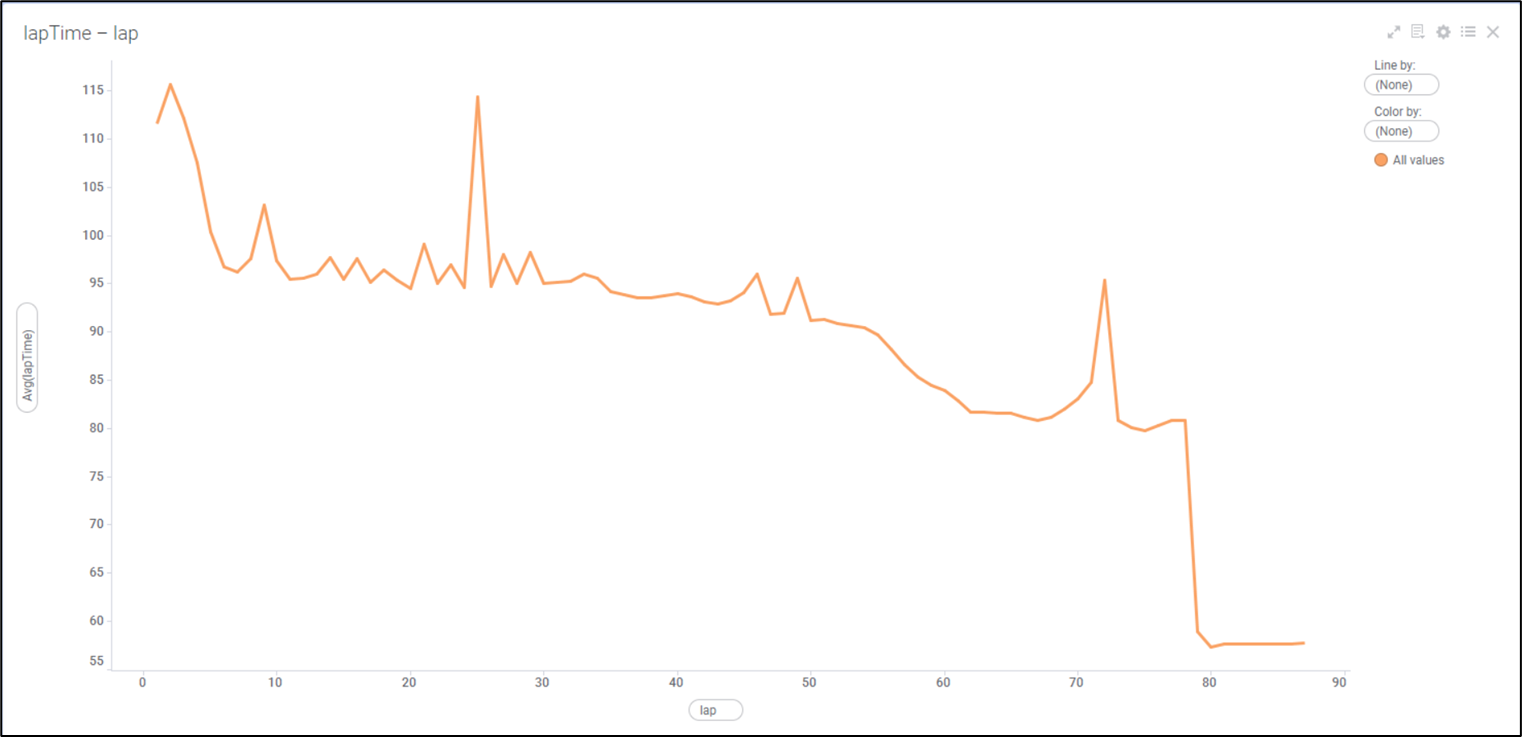

Now we have a line chart which focuses on the relationship between the lap number and the average lap time. From this visual, we instantly see that they is a negative correlation between the lap number and the average lap time. This could be due to the f1 drivers getting comfortable at the beggining laps before speeding up in the later laps or that their lap times decrease over the lap number due to the competitiveness of the race ending. Therefore, lap number will serve as a useful feature to aid in processing the target variable in our final machine learning model.

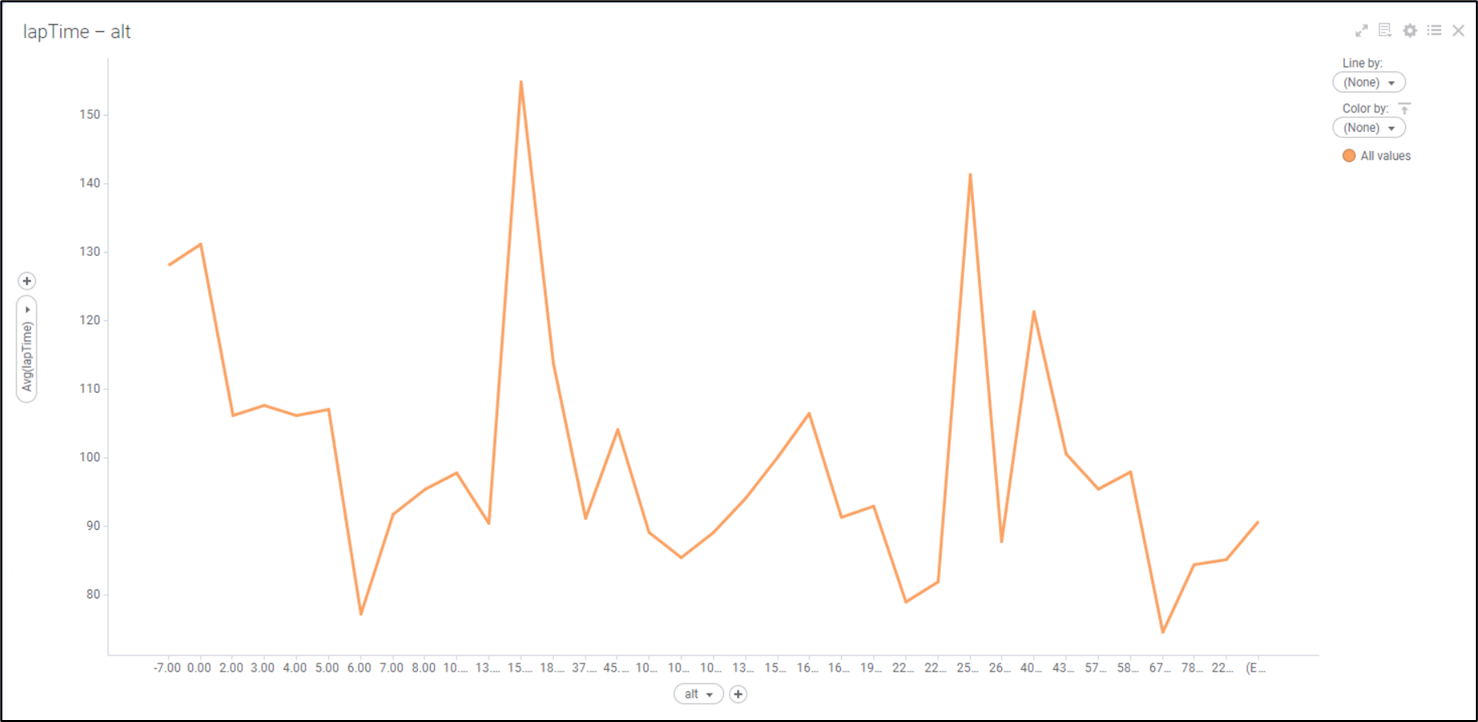

In this visual, we plot a line chart of the altitude of the circuit and the average lap time. From first glance, we do not really see much of a relationship, however we can still use a range to show which altitude, whether it has a low or high altitude might affect the driver and cause their lap times to differ. Hence, we will include this feature to add in more ways of predicting our machine learning model.

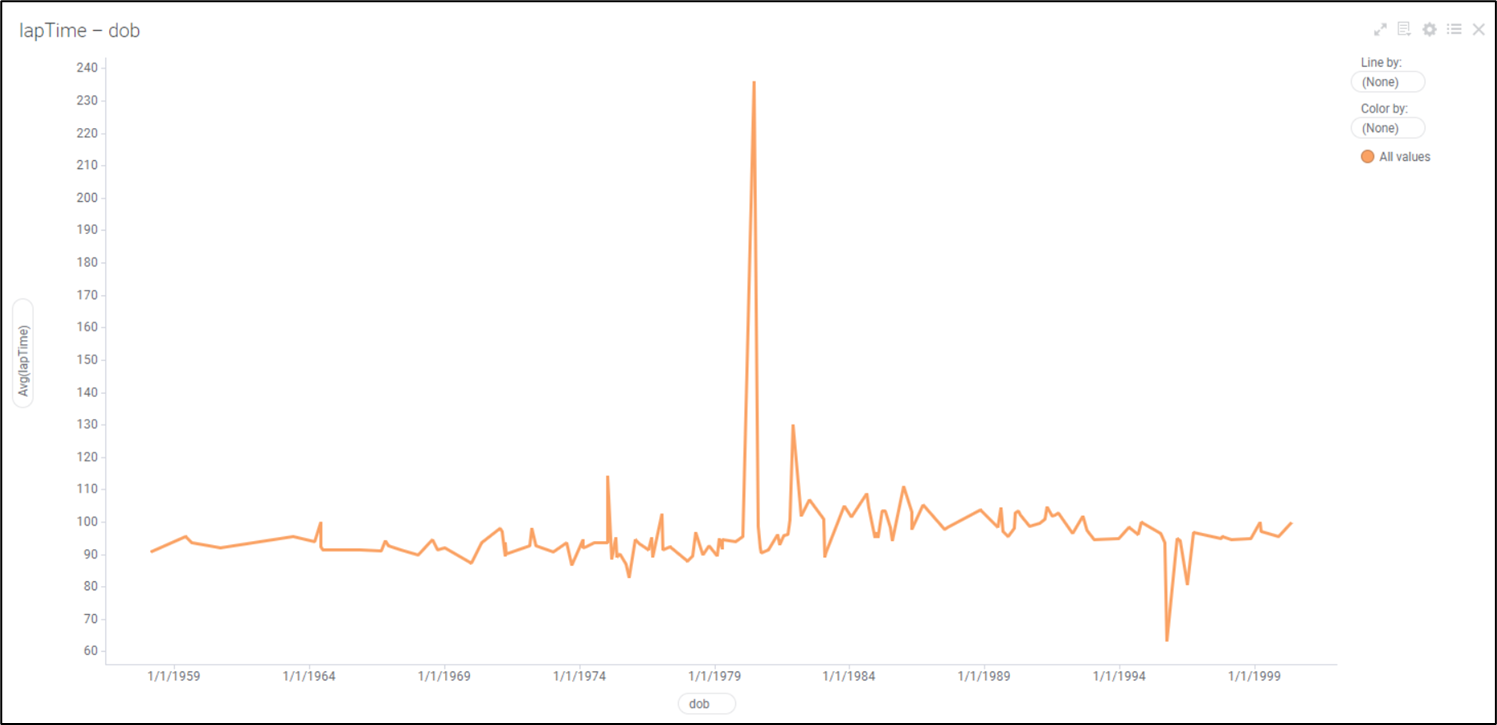

In this visual, we have a line chart of the date of birth/ age of the average lap time. From this visual, we can see a fine line between the young drivers and older drivers. The age of the drivers could affect the lap times due to their years of training and experience in the Formula 1. Hence, older drivers have an edge over younger drivers in terms of experience which might explain why their lap times are faster than the younger drivers.

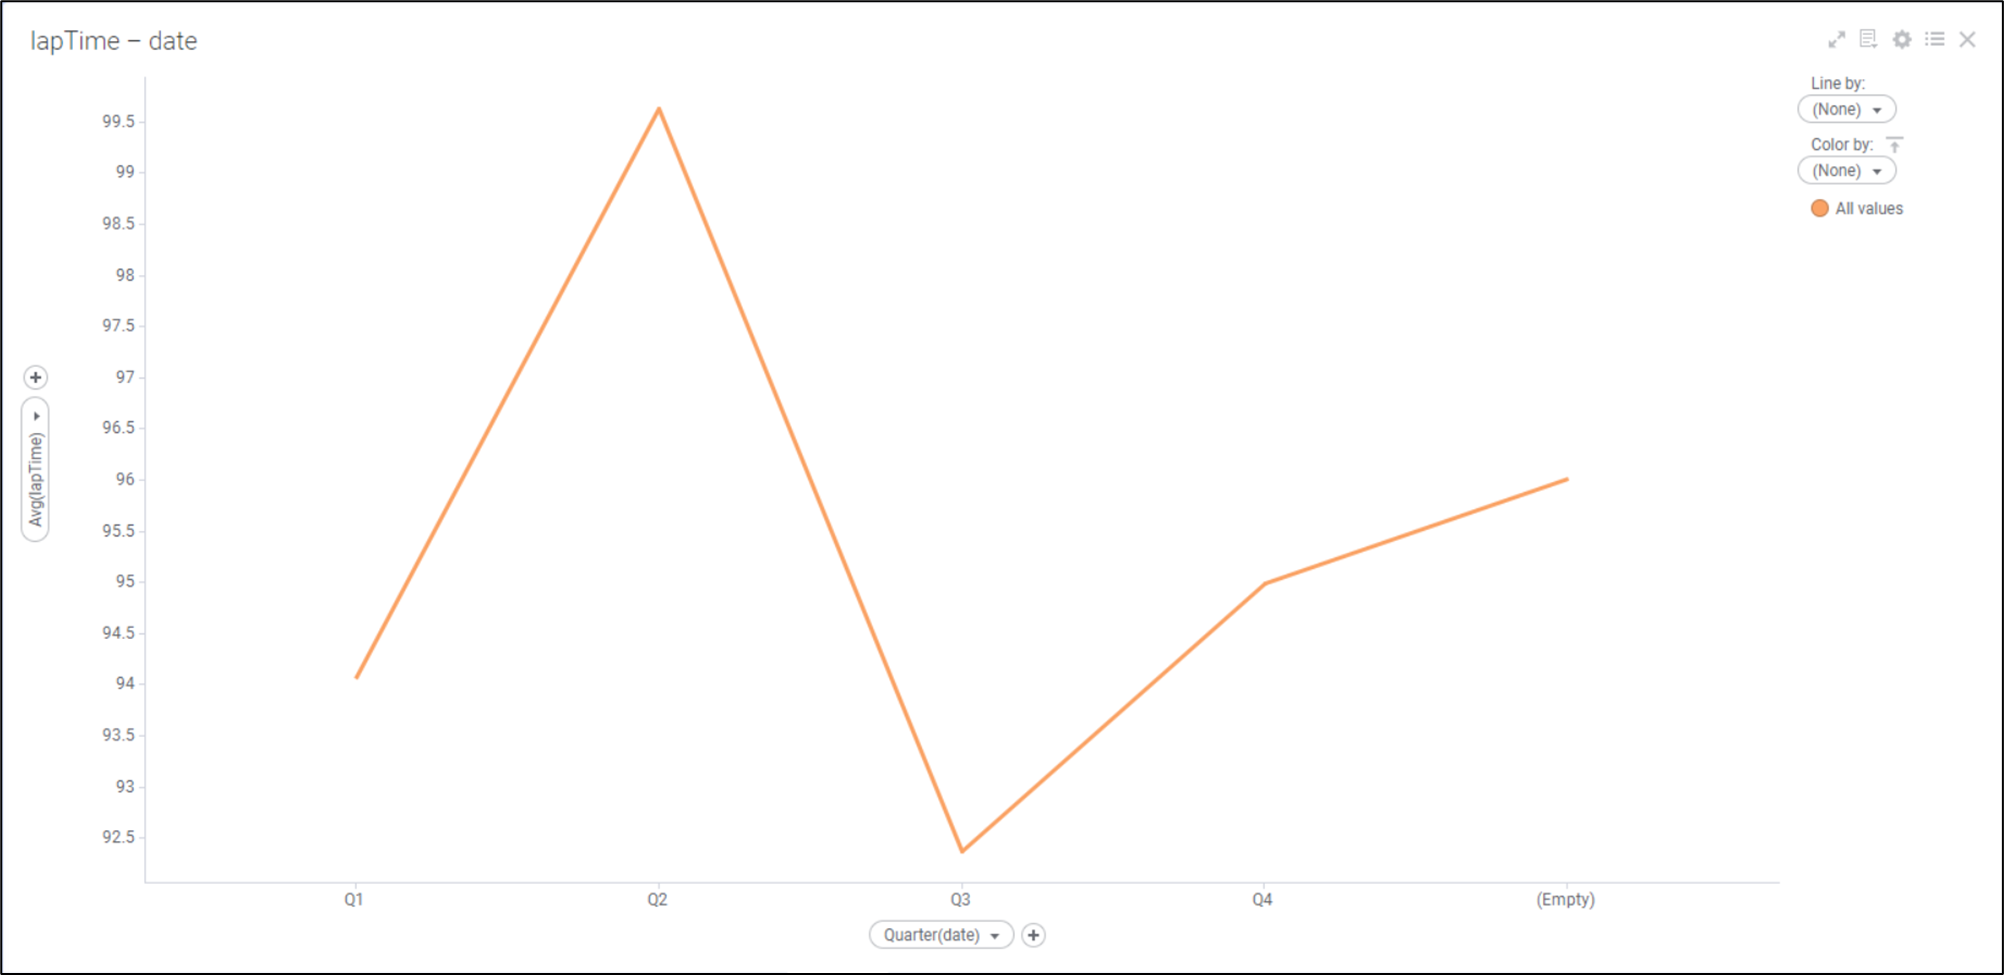

In this visual, we have the average lap time over the different quarters. First we do see that we have null values to be cleaned later on. The next thing we see is that there are quarters which affect the lap times, which might be due to the different seasons and the weather affecting the drivers' lap times. Hence, we will extract the quarters from the date feature for our final dataset to be processed in the machine learning model.

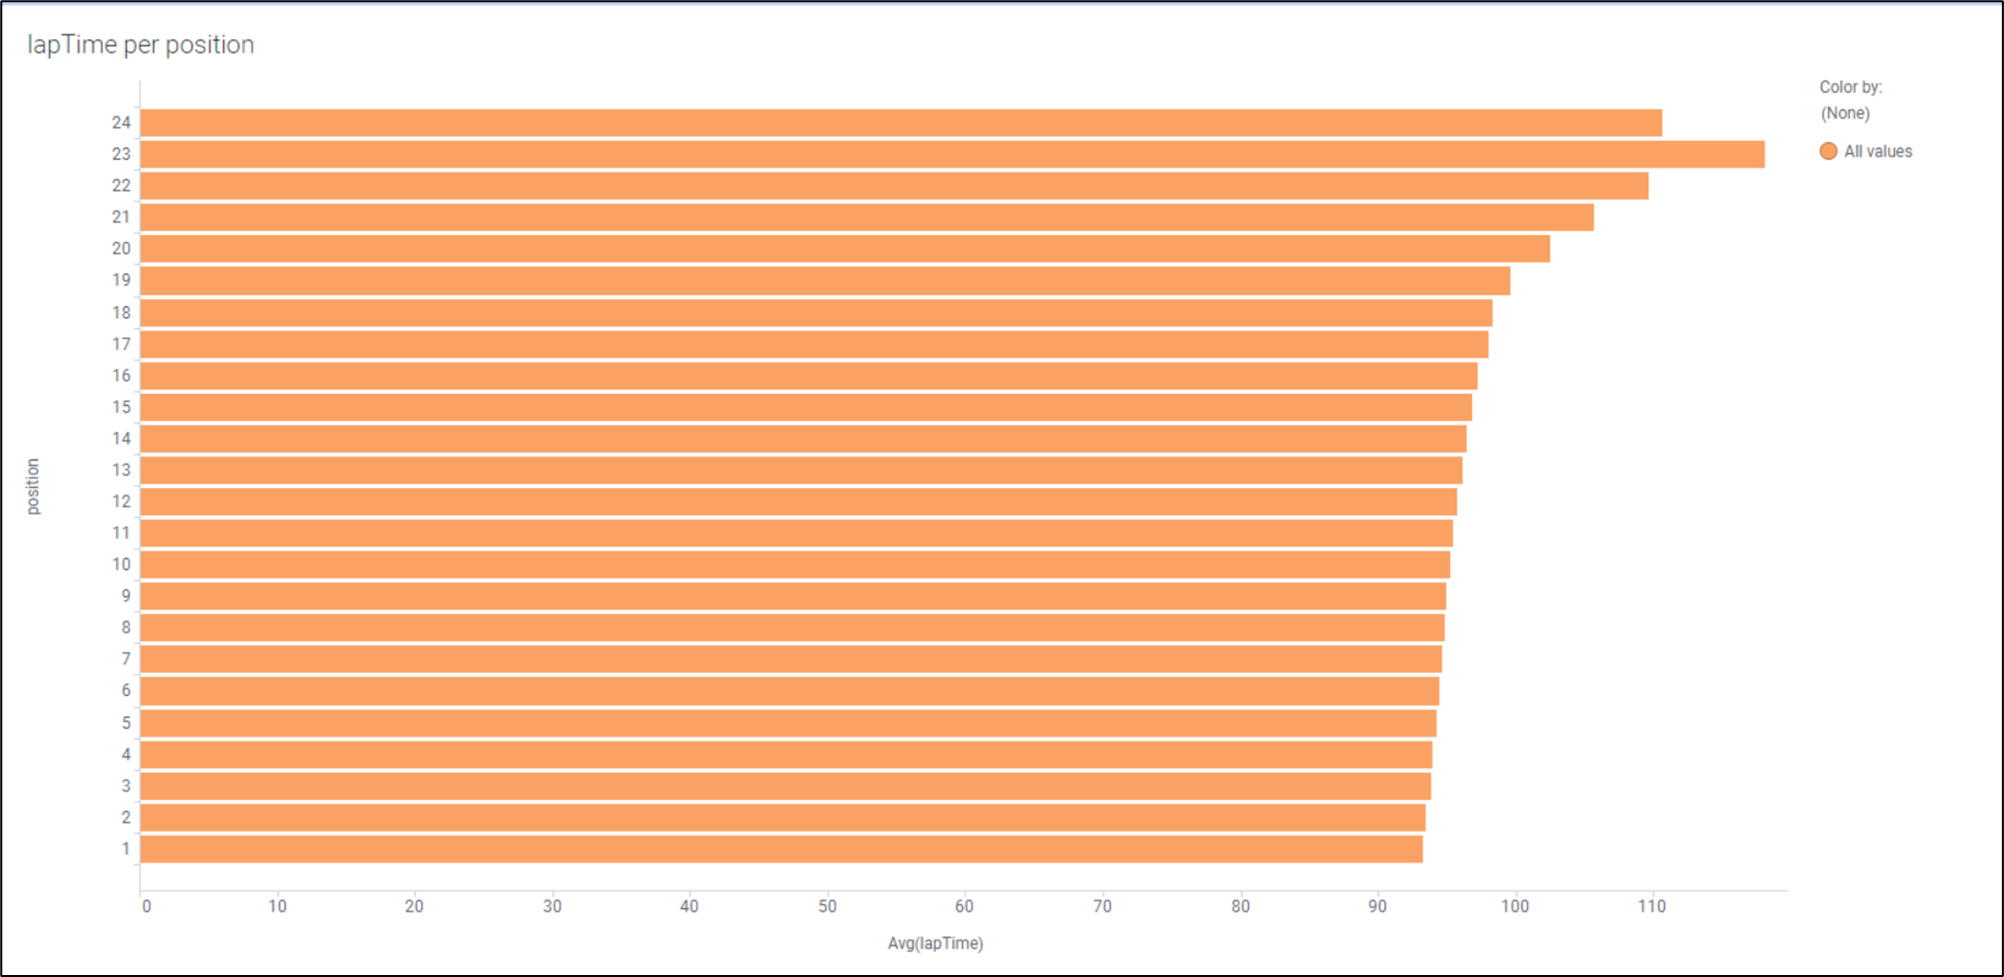

This visual shows a bar chart of the average lap time based on the drivers position on the different laps. From this, we see that drivers who usually take the first position have the fastest lap time, and as the position increases, the lap time also increases. Hence, we see there is a subtle relationship between these two features, thus position of the drivers will then be used for processing in our final machine learning model.

## Step 2: Data Wrangling on multiple tables <a id="2"></a>
[Back to Navigation](#topNav)

In [7]:
# Now let us merge all 4 datasets together using the inner join and their respective unqiue keys
data = pd.merge(lap_times_df, drivers_df, on = 'driverId', how = 'inner').drop_duplicates()

In [8]:
data = pd.merge(data, races_df, on = 'raceId', how = 'inner').drop_duplicates()

In [9]:
data = pd.merge(data, circuits_df, on = 'circuitId', how = 'inner').drop_duplicates()

In [10]:
# Let us make a copy of the merged datasets
df = data.copy()

In [11]:
df.shape

(514592, 28)

In [12]:
# Let us view the merged dataset and whether it works as expected
df.head()

raceId  driverId  lap  position    time_x  milliseconds driverRef number  \
0     841        20    1         1  1:38.109         98109    vettel      5   
1     841        20    2         1  1:33.006         93006    vettel      5   
2     841        20    3         1  1:32.713         92713    vettel      5   
3     841        20    4         1  1:32.803         92803    vettel      5   
4     841        20    5         1  1:32.342         92342    vettel      5   

  code   forename  ...   time_y  \
0  VET  Sebastian  ...  6:00:00   
1  VET  Sebastian  ...  6:00:00   
2  VET  Sebastian  ...  6:00:00   
3  VET  Sebastian  ...  6:00:00   
4  VET  Sebastian  ...  6:00:00   

                                               url_y   circuitRef  \
0  http://en.wikipedia.org/wiki/2011_Australian_G...  albert_park   
1  http://en.wikipedia.org/wiki/2011_Australian_G...  albert_park   
2  http://en.wikipedia.org/wiki/2011_Australian_G...  albert_park   
3  http://en.wikipedia.org/wiki/2011_Australian_G...  albert_park   
4  http://en.wikipedia.org/wiki/2011_Australian_G...  albert_park   

                           name_y   location    country      lat      lng alt  \
0  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
1  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
2  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
3  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
4  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
2  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
3  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
4  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  

[5 rows x 28 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514592 entries, 0 to 514591
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   raceId        514592 non-null  int64  
 1   driverId      514592 non-null  int64  
 2   lap           514592 non-null  int64  
 3   position      514592 non-null  int64  
 4   time_x        514592 non-null  object 
 5   milliseconds  514592 non-null  int64  
 6   driverRef     514592 non-null  object 
 7   number        514592 non-null  object 
 8   code          514592 non-null  object 
 9   forename      514592 non-null  object 
 10  surname       514592 non-null  object 
 11  dob           514592 non-null  object 
 12  nationality   514592 non-null  object 
 13  url_x         514592 non-null  object 
 14  round         514592 non-null  int64  
 15  circuitId     514592 non-null  int64  
 16  name_x        514592 non-null  object 
 17  date          503912 non-null  object 
 18  time

In [14]:
# We will now choose the chosen features based on our EDA we performed and how related they are to the target variable
chosen_variables = ['lap', 'position', 'milliseconds',
                    'forename', 'surname', 'dob', 'date',
                    'round', 'name_y', 'alt']

df = df[chosen_variables]

In [15]:
df.head()

lap  position  milliseconds   forename surname         dob       date  \
0    1         1         98109  Sebastian  Vettel  1987-07-03  3/27/2011   
1    2         1         93006  Sebastian  Vettel  1987-07-03  3/27/2011   
2    3         1         92713  Sebastian  Vettel  1987-07-03  3/27/2011   
3    4         1         92803  Sebastian  Vettel  1987-07-03  3/27/2011   
4    5         1         92342  Sebastian  Vettel  1987-07-03  3/27/2011   

   round                          name_y alt  
0      1  Albert Park Grand Prix Circuit  10  
1      1  Albert Park Grand Prix Circuit  10  
2      1  Albert Park Grand Prix Circuit  10  
3      1  Albert Park Grand Prix Circuit  10  
4      1  Albert Park Grand Prix Circuit  10

In [16]:
# Let us make our target variable and convert it into seconds
df['lapTime'] = df['milliseconds']/1000

In [17]:
# We will add the names of the drivers together in order to identify them based on their full name, while reducing dimensions
df['driver_name'] = df['forename'] + ' ' + df['surname']

In [18]:
# We will now calculate the age of the drivers using datetime functions
df['Age'] = (datetime.datetime.today() - pd.to_datetime(df['dob'])).dt.days // 365

In [19]:
# To make it more clear, we will change the name of 'name_y' to 'circuit_name' to know the name is for circuits
df=df.rename(columns = {'name_y':'circuit_name'})

In [20]:
# Check to see whether there are any errors within the dataset
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}": {unique_values}')

Unique values in column "lap": [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Unique values in column "position": [ 1  3  4  2  7  8  6  5 11 12 10  9 13 16 17 15 14 18 19 20 21 22 23 24]
Unique values in column "milliseconds": [ 98109  93006  92713 ... 171036 114394 266095]
Unique values in column "forename": ['Sebastian' 'Lewis' 'Mark' 'Vitaly' 'Felipe' 'Jenson' 'Nico' 'Kamui'
 'Fernando' 'Paul' 'Sébastien' 'Adrian' 'Nick' 'Sergio' 'Heikki' 'Pastor'
 'Jarno' 'Jérôme' 'Timo' 'Rubens' 'Jaime' 'Michael' 'Daniel' 'Bruno'
 'Romain' 'Kimi' 'Jean-Éric' 'Charles' 'Esteban' 'Giedo' 'Jules' 'Max'
 'Valtteri' 'Kevin' 'Daniil' 'Marcus' 'Carlos' 'Jolyon' 'Pascal' 'Rio'
 'Giancarlo' 'Robert' 'Kazuki' 'Nelson' 'Vitantonio' 'Pedro' 'Karun'
 'Lucas' 'Stoffel' 'Lance' 'Antonio' 'Pierre'

Unique values in column "lapTime": [ 98.109  93.006  92.713 ... 171.036 114.394 266.095]
Unique values in column "driver_name": ['Sebastian Vettel' 'Lewis Hamilton' 'Mark Webber' 'Vitaly Petrov'
 'Felipe Massa' 'Jenson Button' 'Nico Rosberg' 'Kamui Kobayashi'
 'Fernando Alonso' 'Paul di Resta' 'Sébastien Buemi' 'Adrian Sutil'
 'Nick Heidfeld' 'Sergio Pérez' 'Heikki Kovalainen' 'Pastor Maldonado'
 'Jarno Trulli' "Jérôme d'Ambrosio" 'Timo Glock' 'Rubens Barrichello'
 'Jaime Alguersuari' 'Michael Schumacher' 'Daniel Ricciardo' 'Bruno Senna'
 'Romain Grosjean' 'Kimi Räikkönen' 'Jean-Éric Vergne' 'Charles Pic'
 'Esteban Gutiérrez' 'Giedo van der Garde' 'Jules Bianchi' 'Max Chilton'
 'Valtteri Bottas' 'Nico Hülkenberg' 'Kevin Magnussen' 'Daniil Kvyat'
 'Marcus Ericsson' 'Carlos Sainz' 'Felipe Nasr' 'Max Verstappen'
 'Jolyon Palmer' 'Pascal Wehrlein' 'Rio Haryanto' 'Giancarlo Fisichella'
 'Robert Kubica' 'Kazuki Nakajima' 'Nelson Piquet Jr.'
 'Sébastien Bourdais' 'Vitantonio Liuzzi' 'Pedro de

In [21]:
# We see that there are some values where we need to clean
# 1. null values being '\\N' 
# 2. values such as '9/16/12018' and '9/4/12005' in the date column

In [22]:
# Let us replace '\\N' to be null values
df.replace('\\N', np.nan, inplace=True)

In [23]:
# From df.info we see that we should change the 'alt' column to be a float
df['alt'] = df['alt'].astype('float')

In [24]:
# Now we will remove the 1 in the year of the date column for it to be 4 digits. We will use the regular expression for this
df['date'] = df['date'].str.replace(r'(\d+)/(\d+)/1(\d{4})', r'\1/\2/\3', regex=True)

In [25]:
# Let us check
df['date'].unique()

array(['3/27/2011', '3/18/2012', '3/17/2013', nan, '3/15/2015',
       '3/29/2009', '3/28/2010', '3/26/2017', '3/25/2018', '3/17/2019',
       '3/18/2007', '3/16/2008', '3/3/2002', '3/9/2003', '3/7/2004',
       '3/6/2005', '4/2/2006', '3/12/2000', '3/4/2001', '3/9/1997',
       '3/8/1998', '3/7/1999', '3/10/1996', '4/10/2011', '3/25/2012',
       '3/24/2013', '3/30/2014', '3/29/2015', '3/23/2008', '4/5/2009',
       '4/4/2010', '10/1/2017', '4/8/2007', '10/2/2016', '3/17/2002',
       '3/23/2003', '3/21/2004', '3/20/2005', '3/19/2006', '10/22/2000',
       '3/18/2001', '10/17/1999', '4/17/2011', '4/15/2012', '4/14/2013',
       '4/20/2014', '4/12/2015', '10/7/2007', '10/19/2008', '4/19/2009',
       '4/18/2010', '4/17/2016', '4/9/2017', '4/14/2019', '10/16/2005',
       '10/1/2006', '5/8/2011', '8/26/2007', '5/11/2008', '6/7/2009',
       '5/30/2010', '11/15/2020', '10/10/2021', '8/21/2005', '8/27/2006',
       '5/22/2011', '5/13/2012', '5/12/2013', '5/11/2014', '5/10/2015',
       '5

In [26]:
# Now we will use time-series to extract quarter out of the date column
df['quarter'] = pd.to_datetime(df['date']).dt.quarter

In [27]:
# Let us view the null values of quarter that lies within the dataset
df[df['date'].isnull()]

lap  position  milliseconds   forename   surname         dob date  \
3251      1        15        120977  Sebastian    Vettel  1987-07-03  NaN   
3252      2        16        109947  Sebastian    Vettel  1987-07-03  NaN   
3253      3        16        111460  Sebastian    Vettel  1987-07-03  NaN   
3254      1         4        106128      Lewis  Hamilton  1985-01-07  NaN   
3255      2         5        100287      Lewis  Hamilton  1985-01-07  NaN   
...     ...       ...           ...        ...       ...         ...  ...   
417209   50        18        103790     George   Russell  1998-02-15  NaN   
417210   51        18        104404     George   Russell  1998-02-15  NaN   
417211   52        18        107476     George   Russell  1998-02-15  NaN   
417212   53        17        101785     George   Russell  1998-02-15  NaN   
417213   54        17        101239     George   Russell  1998-02-15  NaN   

        round                    circuit_name    alt  lapTime  \
3251        1  Albert Park Grand Prix Circuit   10.0  120.977   
3252        1  Albert Park Grand Prix Circuit   10.0  109.947   
3253        1  Albert Park Grand Prix Circuit   10.0  111.460   
3254        1  Albert Park Grand Prix Circuit   10.0  106.128   
3255        1  Albert Park Grand Prix Circuit   10.0  100.287   
...       ...                             ...    ...      ...   
417209     19         Circuit of the Americas  161.0  103.790   
417210     19         Circuit of the Americas  161.0  104.404   
417211     19         Circuit of the Americas  161.0  107.476   
417212     19         Circuit of the Americas  161.0  101.785   
417213     19         Circuit of the Americas  161.0  101.239   

             driver_name  Age  quarter  
3251    Sebastian Vettel   36      NaN  
3252    Sebastian Vettel   36      NaN  
3253    Sebastian Vettel   36      NaN  
3254      Lewis Hamilton   38      NaN  
3255      Lewis Hamilton   38      NaN  
...                  ...  ...      ...  
417209    George Russell   25      NaN  
417210    George Russell   25      NaN  
417211    George Russell   25      NaN  
417212    George Russell   25      NaN  
417213    George Russell   25      NaN  

[10680 rows x 14 columns]

In [28]:
# Since we have over 500,000 rows of data, we will drop the 10,680 rows of data with a null value in quarter
df.dropna(subset=['quarter'], inplace=True)

# Let us change the data type of quarter to integer
df['quarter'] = df['quarter'].astype('int64')

In [29]:
# Finally we will drop these columns since we have a calculated feature of them
df = df.drop(['forename', 'surname', 'milliseconds', 'date', 'dob'], axis = 1)

In [30]:
# Let us view the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503912 entries, 0 to 514591
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lap           503912 non-null  int64  
 1   position      503912 non-null  int64  
 2   round         503912 non-null  int64  
 3   circuit_name  503912 non-null  object 
 4   alt           502800 non-null  float64
 5   lapTime       503912 non-null  float64
 6   driver_name   503912 non-null  object 
 7   Age           503912 non-null  int64  
 8   quarter       503912 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 38.4+ MB


In [31]:
df.head()

lap  position  round                    circuit_name   alt  lapTime  \
0    1         1      1  Albert Park Grand Prix Circuit  10.0   98.109   
1    2         1      1  Albert Park Grand Prix Circuit  10.0   93.006   
2    3         1      1  Albert Park Grand Prix Circuit  10.0   92.713   
3    4         1      1  Albert Park Grand Prix Circuit  10.0   92.803   
4    5         1      1  Albert Park Grand Prix Circuit  10.0   92.342   

        driver_name  Age  quarter  
0  Sebastian Vettel   36        1  
1  Sebastian Vettel   36        1  
2  Sebastian Vettel   36        1  
3  Sebastian Vettel   36        1  
4  Sebastian Vettel   36        1

## Step 3: Data Cleansing and Transformation <a id="3"></a>
[Back to Navigation](#topNav)

### Step 3.1: Outliers Removal/ Capping <a id="3.1"></a>
[Back to Navigation](#topNav)

In [32]:
# identify numeric columns
num_cols = [n for n in df.columns if df[n].dtypes in ['int64', 'float64']]
num_cols

['lap', 'position', 'round', 'alt', 'lapTime', 'Age', 'quarter']

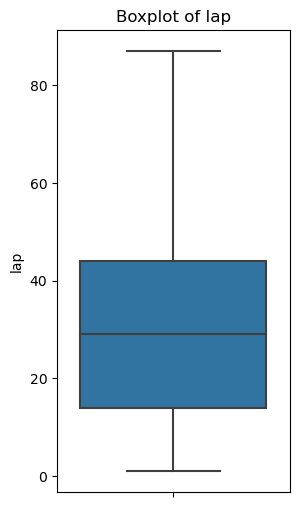

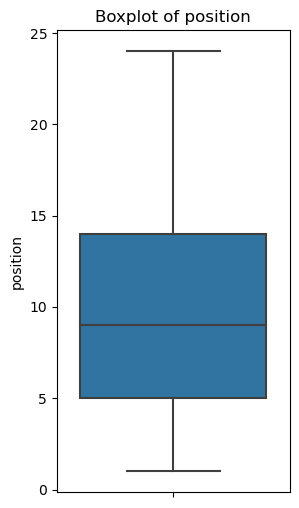

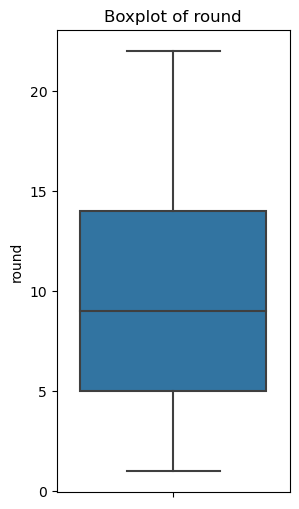

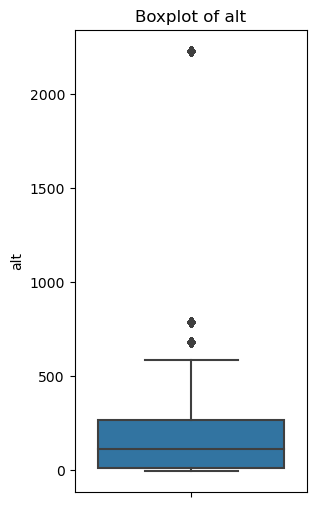

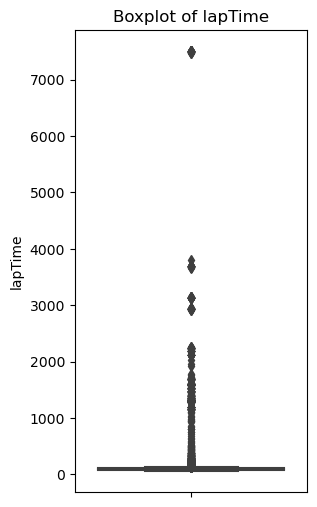

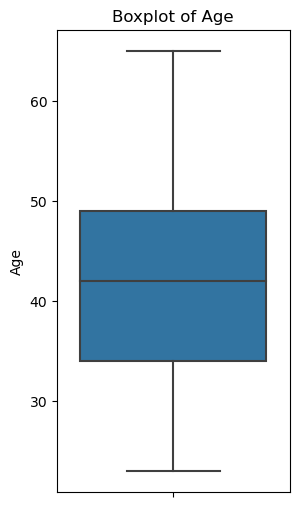

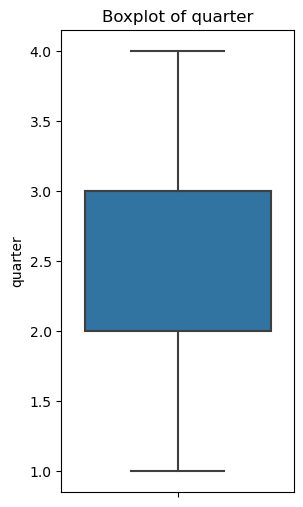

In [33]:
# identify if outliers are present with boxplot 

for col in num_cols:
    plt.figure(figsize=(3,6))
    sns.boxplot(y=df[col])
    plt.title('Boxplot of ' + col, size = 12)


In [34]:
# Only 2 variables contain outliers which are 'alt' & 'lapTime'
# Let's define a function to find the ouliers

def find_outliers(df, variable, distance):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lowerBoundary = df[variable].quantile(0.25) - (IQR * distance)
    upperBoundary = df[variable].quantile(0.75) + (IQR * distance)
    
    outliers = np.where(df[variable] > upperBoundary, True,
                       np.where(df[variable] < lowerBoundary, True, False))
    
    return outliers

In [35]:
# Let us look at the outliers of 'alt'
alt_outliers = find_outliers(df, 'alt', 1.5)

print("Outliers for alt")
alt_outliers_df = df.loc[alt_outliers]
alt_outliers_df.head()

Outliers for alt


lap  position  round                circuit_name    alt  lapTime  \
339823    1         1     19  Autódromo José Carlos Pace  785.0   82.384   
339824    2         1     19  Autódromo José Carlos Pace  785.0   78.240   
339825    3         1     19  Autódromo José Carlos Pace  785.0   78.239   
339826    4         1     19  Autódromo José Carlos Pace  785.0   77.784   
339827    5         1     19  Autódromo José Carlos Pace  785.0   77.879   

             driver_name  Age  quarter  
339823  Sebastian Vettel   36        4  
339824  Sebastian Vettel   36        4  
339825  Sebastian Vettel   36        4  
339826  Sebastian Vettel   36        4  
339827  Sebastian Vettel   36        4

In [36]:
# Looking at the outliers, we will not touch on altitude since they are stats and cannot be changed

In [37]:
# Let us look at the outliers of 'lapTime'
lapTime_outliers = find_outliers(df, 'lapTime', 1.5)

print("Outliers for lapTime")
lapTime_outliers_df = df.loc[lapTime_outliers]
lapTime_outliers_df.head()

Outliers for lapTime


lap  position  round                    circuit_name   alt  lapTime  \
928    19        21      1  Albert Park Grand Prix Circuit  10.0  708.170   
981    23        15      1  Albert Park Grand Prix Circuit  10.0  144.606   
1007    1        21      1  Albert Park Grand Prix Circuit  10.0  133.879   
1064    1        22      1  Albert Park Grand Prix Circuit  10.0  161.428   
1120   38         2      1  Albert Park Grand Prix Circuit  10.0  163.068   

             driver_name  Age  quarter  
928           Timo Glock   41        1  
981   Rubens Barrichello   51        1  
1007   Jaime Alguersuari   33        1  
1064  Michael Schumacher   54        1  
1120    Sebastian Vettel   36        1

In [38]:
lapTime_outliers_df.shape

(14215, 9)

#### Australia Grand Prix 2011
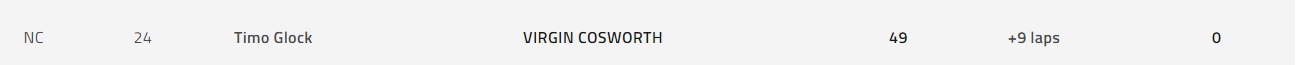
Ref:https://www.formula1.com/en/results.html/2011/races/28/australia/race-result.html

In [39]:
# Looking at the position of Timo Glock being a NC and a lap time of 708.170s on the 19 lap, this meant that some of the data
# were keyed in wrongly into the dataset as the number is too high. Hence we will perform trimming to get rid of the wrong
# data keyed in
df_trimmed = df.loc[~lapTime_outliers ]

# Let's see the shape of the normal and trim
df.shape, df_trimmed.shape

((503912, 9), (489697, 9))

In [40]:
# We will trim since not much of the data is lost
df = df_trimmed

<Axes: ylabel='lapTime'>

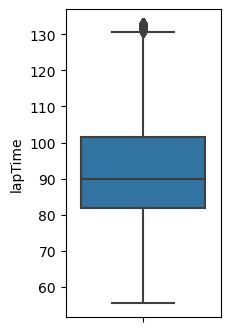

In [41]:
# Let us check
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['lapTime'])

### Step 3.2: Train and Test Split <a id="3.2"></a>
[Back to Navigation](#topNav)

In [42]:
# let's separate into training and testing set with 'lapTime' as our target variable
X_train, X_test, y_train, y_test = train_test_split(df.drop('lapTime', axis = 1),
                                                   df['lapTime'],
                                                   test_size = 0.3,
                                                   random_state = 0)
X_train.shape, X_test.shape

((342787, 8), (146910, 8))

### Step 3.3: Missing Value Imputation <a id="3.3"></a>
[Back to Navigation](#topNav)

In [43]:
# Let us remove 'lapTime' from our num_cols since it is our target variable
num_cols.remove('lapTime')

In [44]:
# Let us check the number of null in our num_cols
X_train[num_cols].isnull().sum().sort_values(ascending=False)

alt         794
lap           0
position      0
round         0
Age           0
quarter       0
dtype: int64

In [45]:
# Let us identify which circuits is missing its altitude data
alt_missing = X_train[X_train['alt'].isnull()]
alt_missing['circuit_name'].unique()

array(['Losail International Circuit'], dtype=object)

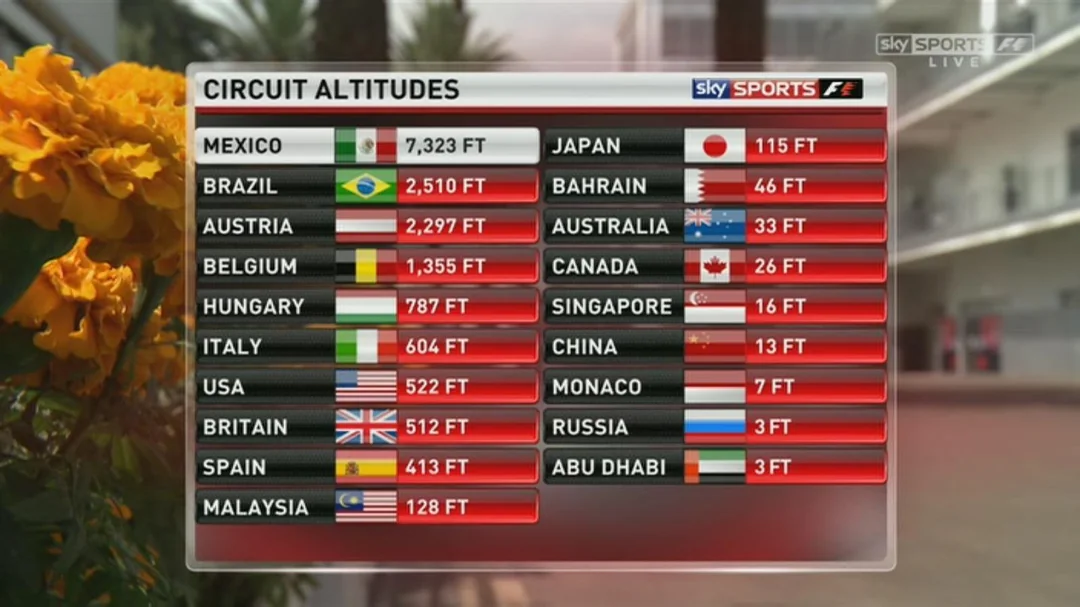
Ref: https://www.reddit.com/r/formula1/comments/3qztlh/circuit_altitudes_for_every_track_this_year/

In [46]:
# With the 'Losail International Circuit' being in the country of Bahrain, we identify that the altitude is 46 FT/ 14m
# We will replace all null values to 14 since the circuits are all for 'Losail International Circuit' using the arbitrary imputer
imputer = ArbitraryNumberImputer(
    arbitrary_number= 14, variables='alt')

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=14, variables='alt')

In [47]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [48]:
# Let us check
X_train[num_cols].isnull().sum().sort_values(ascending=False)

lap         0
position    0
round       0
alt         0
Age         0
quarter     0
dtype: int64

In [49]:
# Identify categorical cols
cat_cols = [c for c in df.columns if df[c].dtypes in ['O']]

In [50]:
# Let us check the number of null in our cat_cols
X_train[cat_cols].isnull().sum().sort_values(ascending=False)

circuit_name    0
driver_name     0
dtype: int64

In [51]:
# We do not need to do any imputation since there are no null values in cat_cols

### Step 3.4: Categorical Data Encoding <a id="3.4"></a>
[Back to Navigation](#topNav)

In [52]:
X_train[cat_cols].head()

circuit_name         driver_name
334074              Yas Marina Circuit    Daniel Ricciardo
263944    Autodromo Nazionale di Monza        Adrian Sutil
313458                  Suzuka Circuit  Rubens Barrichello
87404   Circuit de Barcelona-Catalunya     Ralf Schumacher
50606   Shanghai International Circuit   Esteban Gutiérrez

In [53]:
# For categorical data encoding, let us decide what our top_categories should be based on the frequency of values in cat_cols
pd.set_option('display.max_rows', None)

for column in X_train[cat_cols]:
    value_counts = X_train[column].value_counts()
    print(f"Frequency counts for '{column}':\n{value_counts}\n")
    
pd.reset_option('display.max_rows')

Frequency counts for 'circuit_name':
Hungaroring                             22745
Circuit de Monaco                       22433
Circuit de Barcelona-Catalunya          20655
Autódromo José Carlos Pace              20539
Circuit Gilles Villeneuve               18855
Silverstone Circuit                     18294
Autodromo Nazionale di Monza            15904
Suzuka Circuit                          13656
Albert Park Grand Prix Circuit          13286
Bahrain International Circuit           13253
Sepang International Circuit            12226
Hockenheimring                          12214
Nürburgring                             11946
Circuit de Nevers Magny-Cours           11116
Circuit de Spa-Francorchamps            10891
Shanghai International Circuit          10019
Yas Marina Circuit                       9316
Autodromo Enzo e Dino Ferrari            9275
Red Bull Ring                            9031
Marina Bay Street Circuit                8593
Istanbul Park                            71

In [54]:
# Let us use rare label categories to identify the rare categories in our dataset
# This will help improve our data by marking the rare categories in order for the low frequency values to be grouped together
# Thus making the categorical encoding to encode less unique values

rare_cols = ['driver_name']

rare_encoder = RareLabelEncoder(tol=0.05, n_categories=4, variables=rare_cols)  

rare_encoder.fit(X_train)

X_train_rare = rare_encoder.transform(X_train)
X_test_rare = rare_encoder.transform(X_test)

In [55]:
X_train_rare.head()

lap  position  round                    circuit_name    alt  \
334074    3         4     21              Yas Marina Circuit    3.0   
263944   32        19     13    Autodromo Nazionale di Monza  162.0   
313458   14         3     17                  Suzuka Circuit   45.0   
87404    17         9      5  Circuit de Barcelona-Catalunya  109.0   
50606    42        15      3  Shanghai International Circuit    5.0   

       driver_name  Age  quarter  
334074        Rare   34        4  
263944        Rare   40        3  
313458        Rare   51        4  
87404         Rare   48        2  
50606         Rare   32        2

In [56]:
X_train = X_train_rare
X_test = X_test_rare

In [57]:
# Let us try one-hot encoding with a top_categories of 20 since there is no cluster of data for the most frequent values
# Since the data are all continuously distributed, we will use top_categories of 20
ohe_enc = OneHotEncoder(
    top_categories=20,
    drop_last=False) 

ohe_enc.fit(X_train)

X_train_ohe = ohe_enc.transform(X_train)
X_test_ohe = ohe_enc.transform(X_test)

In [58]:
X_train_ohe.head()

lap  position  round    alt  Age  quarter  circuit_name_Hungaroring  \
334074    3         4     21    3.0   34        4                         0   
263944   32        19     13  162.0   40        3                         0   
313458   14         3     17   45.0   51        4                         0   
87404    17         9      5  109.0   48        2                         0   
50606    42        15      3    5.0   32        2                         0   

        circuit_name_Circuit de Monaco  \
334074                               0   
263944                               0   
313458                               0   
87404                                0   
50606                                0   

        circuit_name_Circuit de Barcelona-Catalunya  \
334074                                            0   
263944                                            0   
313458                                            0   
87404                                             1   
50606                                             0   

        circuit_name_Autódromo José Carlos Pace  ...  \
334074                                        0  ...   
263944                                        0  ...   
313458                                        0  ...   
87404                                         0  ...   
50606                                         0  ...   

        circuit_name_Hockenheimring  circuit_name_Nürburgring  \
334074                            0                         0   
263944                            0                         0   
313458                            0                         0   
87404                             0                         0   
50606                             0                         0   

        circuit_name_Circuit de Nevers Magny-Cours  \
334074                                           0   
263944                                           0   
313458                                           0   
87404                                            0   
50606                                            0   

        circuit_name_Circuit de Spa-Francorchamps  \
334074                                          0   
263944                                          0   
313458                                          0   
87404                                           0   
50606                                           0   

        circuit_name_Shanghai International Circuit  \
334074                                            0   
263944                                            0   
313458                                            0   
87404                                             0   
50606                                             1   

        circuit_name_Yas Marina Circuit  \
334074                                1   
263944                                0   
313458                                0   
87404                                 0   
50606                                 0   

        circuit_name_Autodromo Enzo e Dino Ferrari  \
334074                                           0   
263944                                           0   
313458                                           0   
87404                                            0   
50606                                            0   

        circuit_name_Red Bull Ring  circuit_name_Marina Bay Street Circuit  \
334074                           0                                       0   
263944                           0                                       0   
313458                           0                                       0   
87404                            0                                       0   
50606                            0                                       0   

        driver_name_Rare  
334074                 1  
263944                 1  
313458                 1  
87404                  1  
50606                  1  

[5 rows x 27 columns]

In [59]:
# Let use ordinal encoding
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=None)

ordinal_enc.fit(X_train)

X_train_ordinal = ordinal_enc.transform(X_train)
X_test_ordinal = ordinal_enc.transform(X_test)

In [60]:
X_train_ordinal.head()

lap  position  round  circuit_name    alt  driver_name  Age  quarter
334074    3         4     21             0    3.0            0   34        4
263944   32        19     13             1  162.0            0   40        3
313458   14         3     17             2   45.0            0   51        4
87404    17         9      5             3  109.0            0   48        2
50606    42        15      3             4    5.0            0   32        2

In [61]:
# Let us use count or frequency encoding
count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables=None)

count_enc.fit(X_train)

X_train_count = count_enc.transform(X_train)
X_test_count = count_enc.transform(X_test)

In [62]:
X_train_count.head()

lap  position  round  circuit_name    alt  driver_name  Age  quarter
334074    3         4     21          9316    3.0       342787   34        4
263944   32        19     13         15904  162.0       342787   40        3
313458   14         3     17         13656   45.0       342787   51        4
87404    17         9      5         20655  109.0       342787   48        2
50606    42        15      3         10019    5.0       342787   32        2

In [63]:
# Let us use ordered ordinal encoding
ordinal_enc2 = OrdinalEncoder(
    encoding_method='ordered')

ordinal_enc2.fit(X_train, y_train)

X_train_ordered = ordinal_enc2.transform(X_train)
X_test_ordered = ordinal_enc2.transform(X_test)

In [64]:
X_train_ordered.head()

lap  position  round  circuit_name    alt  driver_name  Age  quarter
334074    3         4     21            35    3.0            0   34        4
263944   32        19     13            16  162.0            0   40        3
313458   14         3     17            29   45.0            0   51        4
87404    17         9      5            14  109.0            0   48        2
50606    42        15      3            34    5.0            0   32        2

In [65]:
# Let us use target mean encoding
mean_enc = MeanEncoder(variables=None)

mean_enc.fit(X_train, y_train)

X_train_mean = mean_enc.transform(X_train)
X_test_mean = mean_enc.transform(X_test)

In [66]:
X_train_mean.head()

lap  position  round  circuit_name    alt  driver_name  Age  quarter
334074    3         4     21    105.972796    3.0    92.223059   34        4
263944   32        19     13     89.004781  162.0    92.223059   40        3
313458   14         3     17    101.370410   45.0    92.223059   51        4
87404    17         9      5     88.463415  109.0    92.223059   48        2
50606    42        15      3    105.303298    5.0    92.223059   32        2

In [67]:
# After trial and errors of combining rare categories and the other encoder and solely using the encoder, the results that 
# gave the best results was from using Rare Label category first followed by Mean Encoder
# Let us use Rare Label category followed by Mean Encoder
X_train = X_train_mean
X_test = X_test_mean

### Step 3.5: Numerical Data Transformation <a id="3.5"></a>
[Back to Navigation](#topNav)

In [68]:
X_train[num_cols].head()

lap  position  round    alt  Age  quarter
334074    3         4     21    3.0   34        4
263944   32        19     13  162.0   40        3
313458   14         3     17   45.0   51        4
87404    17         9      5  109.0   48        2
50606    42        15      3    5.0   32        2

In [69]:
# We will create a function that plots a histogram, qq plot, and boxplot for all numerical columns
def diagnostic_plots(df, variable):
        
    plt.figure(figsize=(16,4))
    
    # Histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable],bins=30)
    plt.title("Histogram")
    
    # QQ Plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    
    # Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot")
    
    plt.show()

lap


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


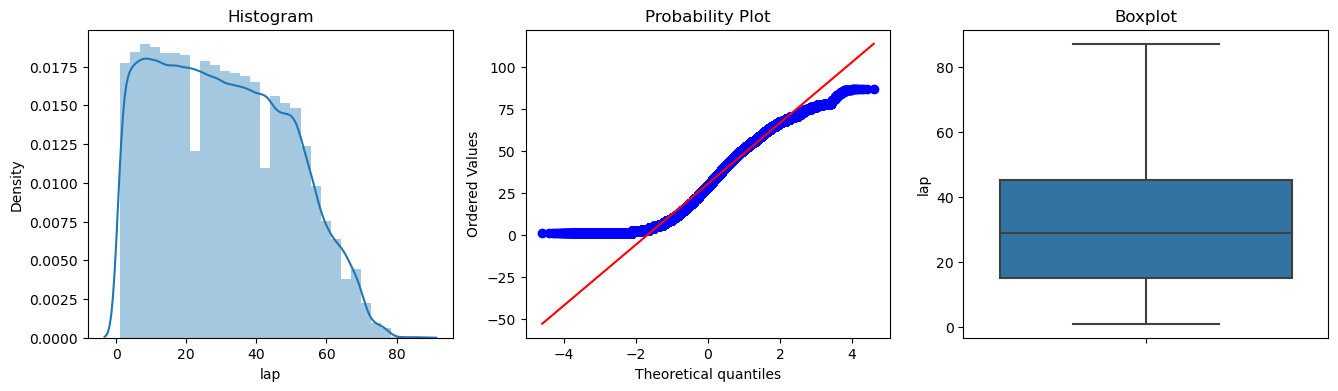

position


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


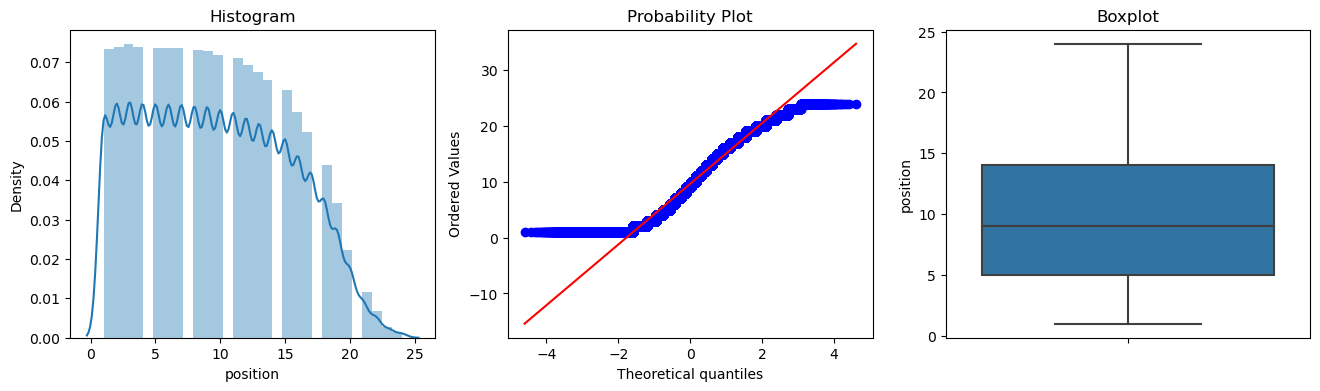

round


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


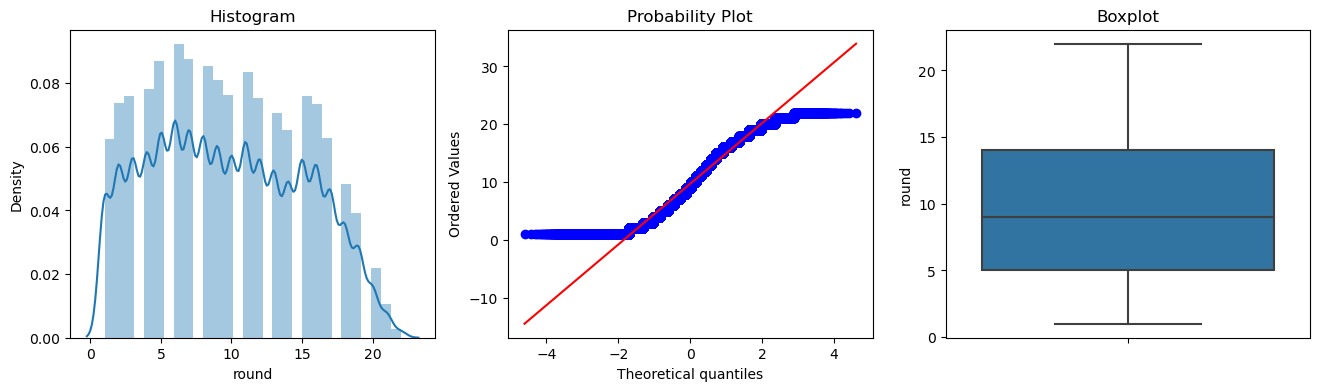

alt


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


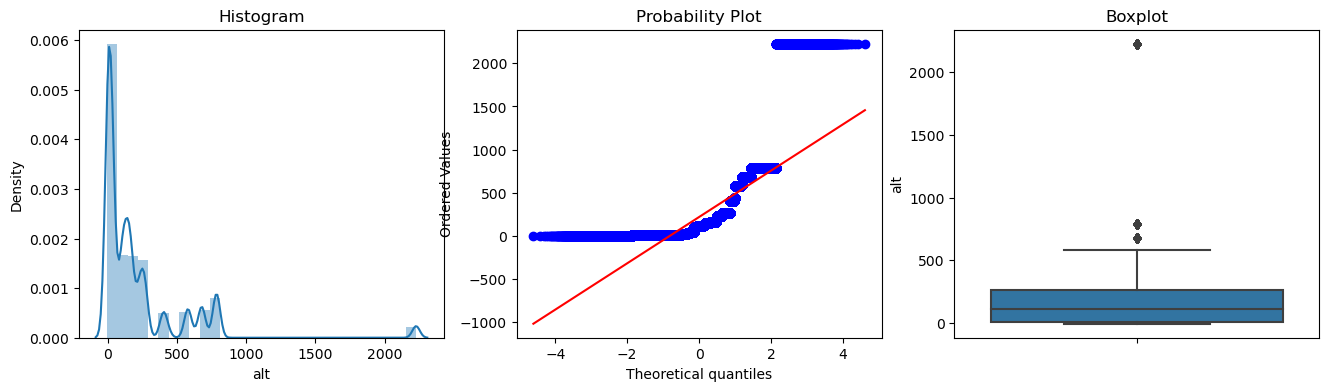

Age


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


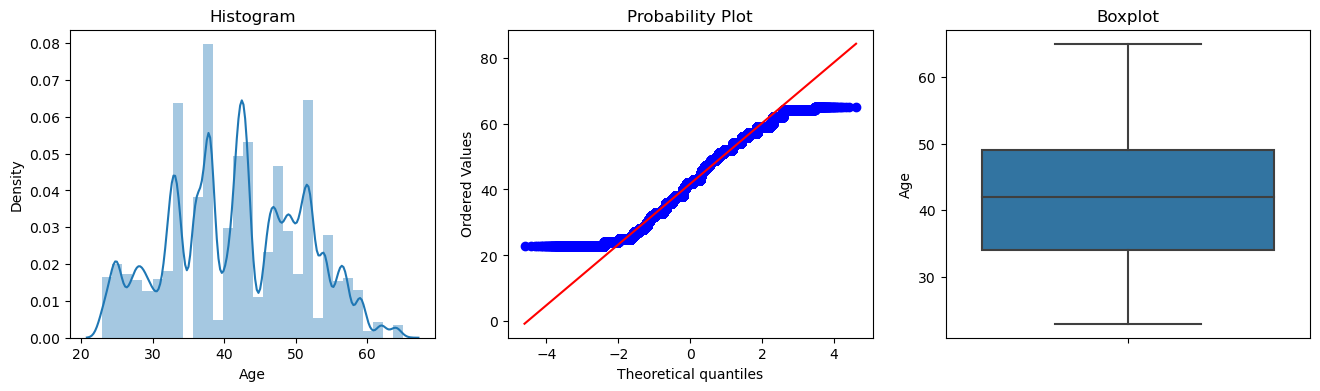

quarter


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


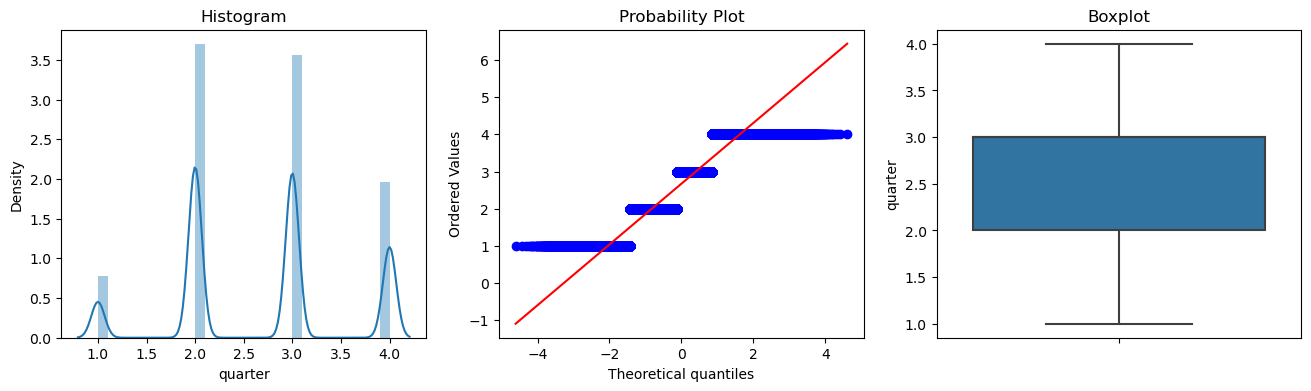

In [70]:
# Let us view the distribtuion of our numerical columns
for numV in num_cols:
    print(numV)
    diagnostic_plots(X_train, numV)

In [71]:
# We are going to test out Power and Yeo-Johnson transformation to see which returns the best results
# Unable to perform Logarithm, Reciprocal, Square-root, Cube-root, and Box-Cox transformation due to value of 0 and negative 
# values being present in the column
# Starting with Power transformation of 2
et = PowerTransformer(variables = num_cols, exp = 2)

et.fit(X_train)

X_train_et = et.transform(X_train)
X_test_et = et.transform(X_test)

lap


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


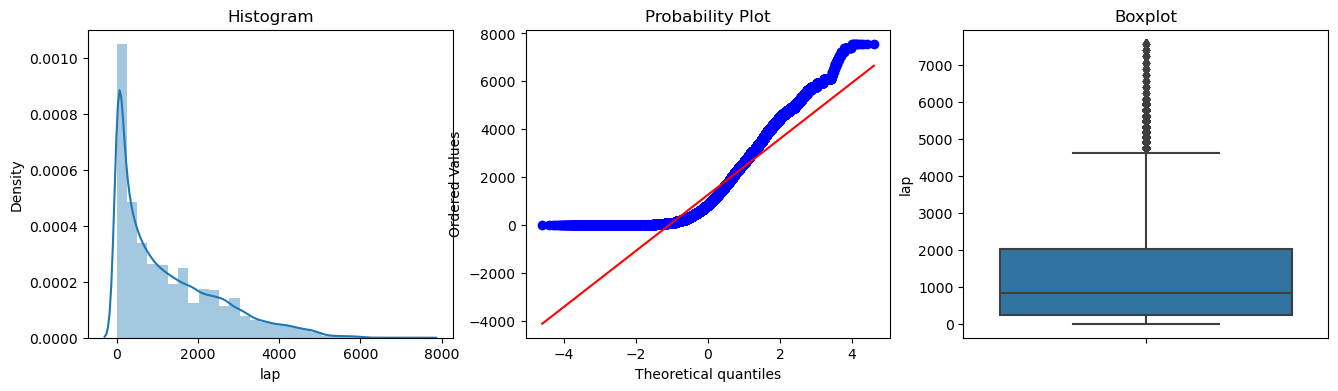

position


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


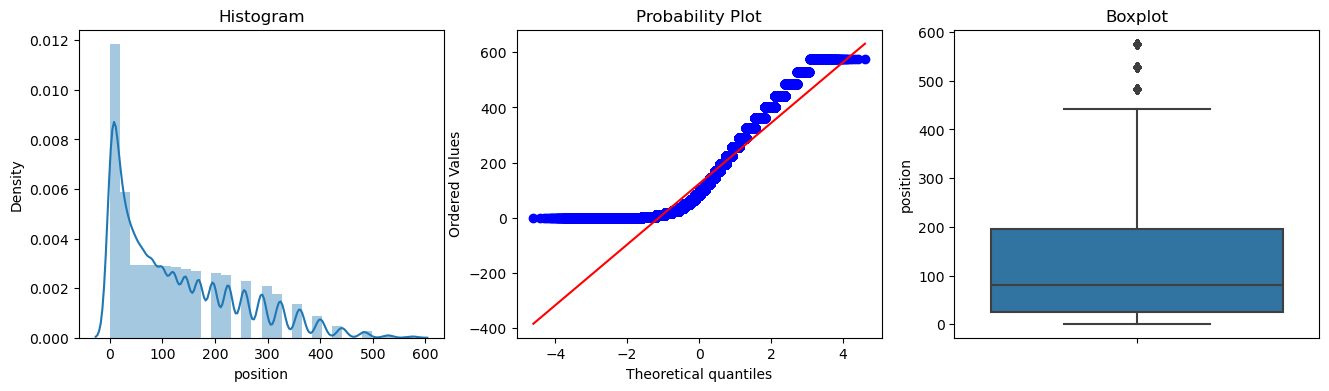

round


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


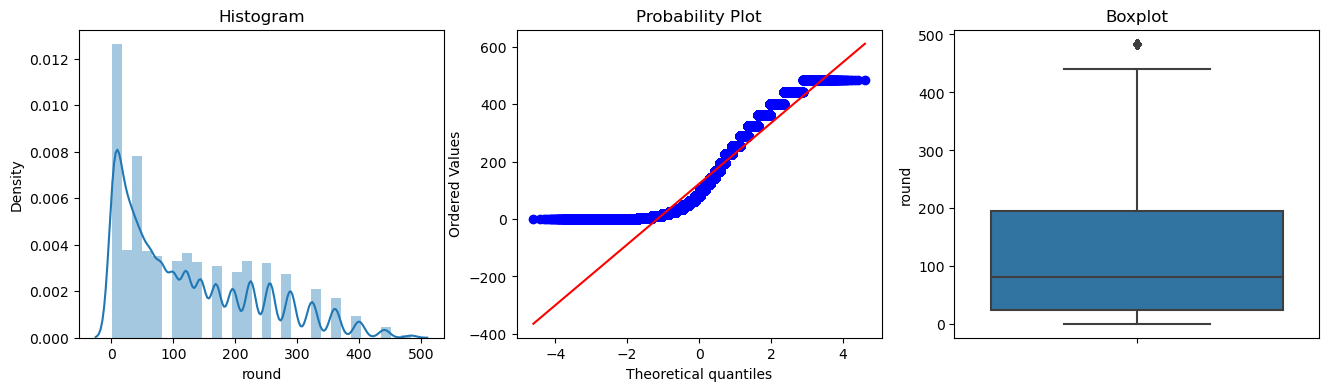

alt


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


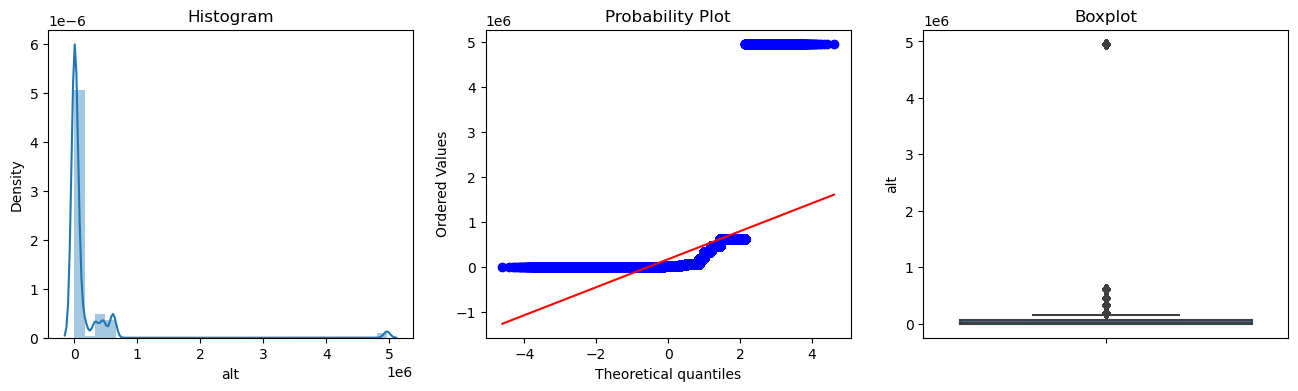

Age


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


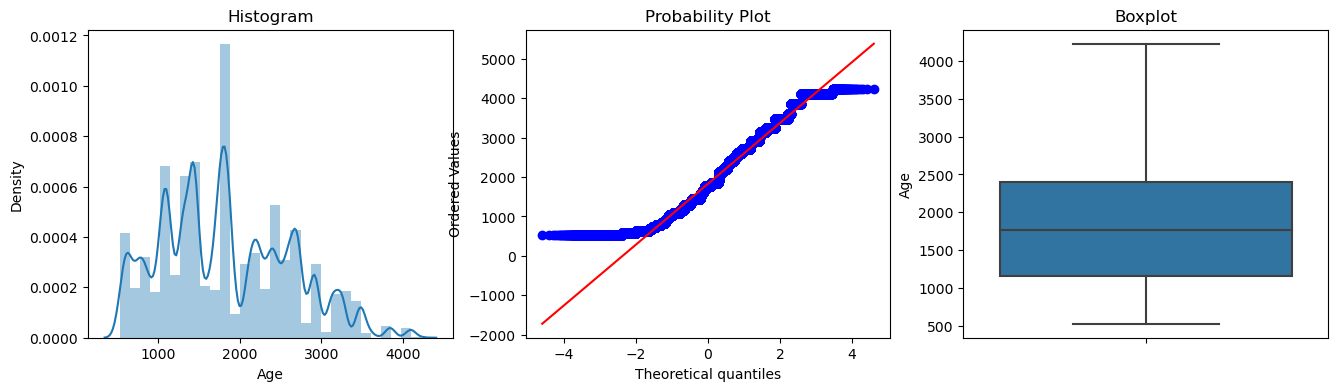

quarter


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


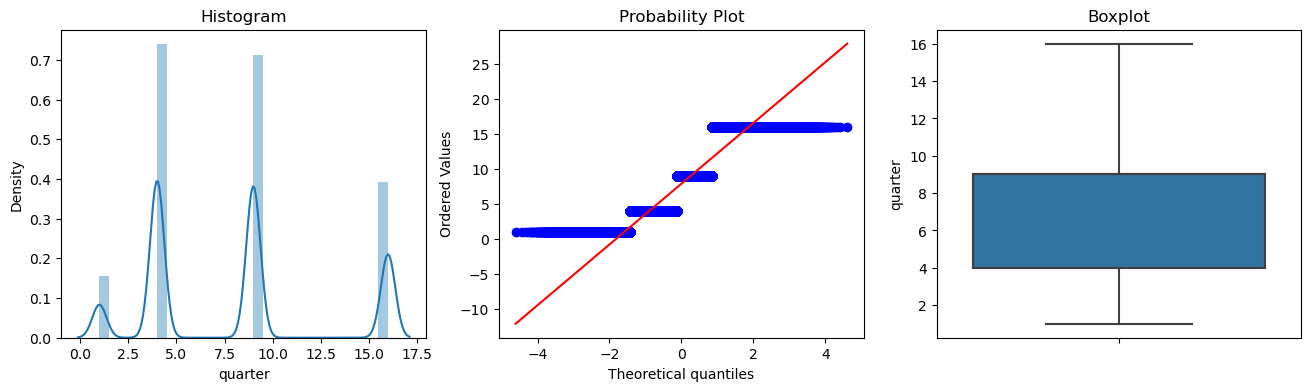

In [72]:
for numV in num_cols:
    print(numV)
    diagnostic_plots(X_train_et, numV)

In [73]:
# Starting with Power transformation of 3
et2 = PowerTransformer(variables = num_cols, exp = 3)

et2.fit(X_train)

X_train_et2 = et2.transform(X_train)
X_test_et2 = et2.transform(X_test)

lap


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


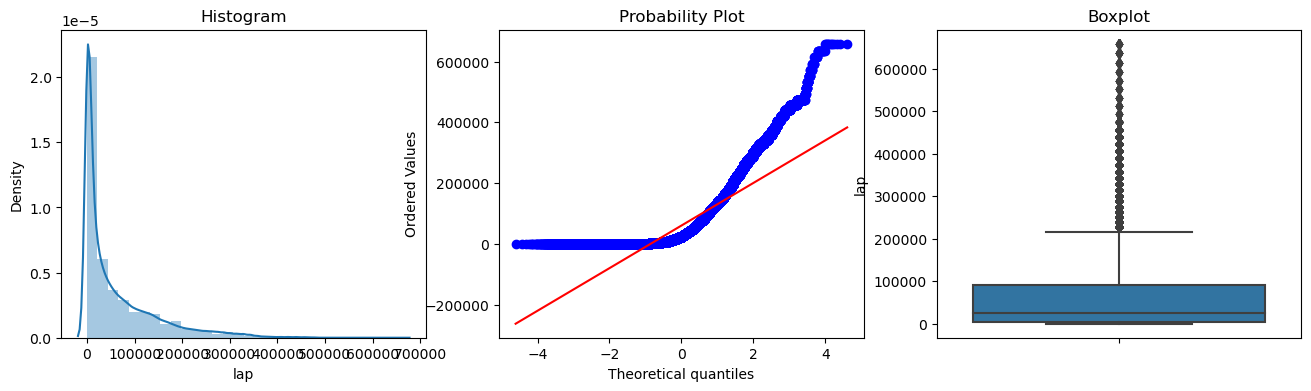

position


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


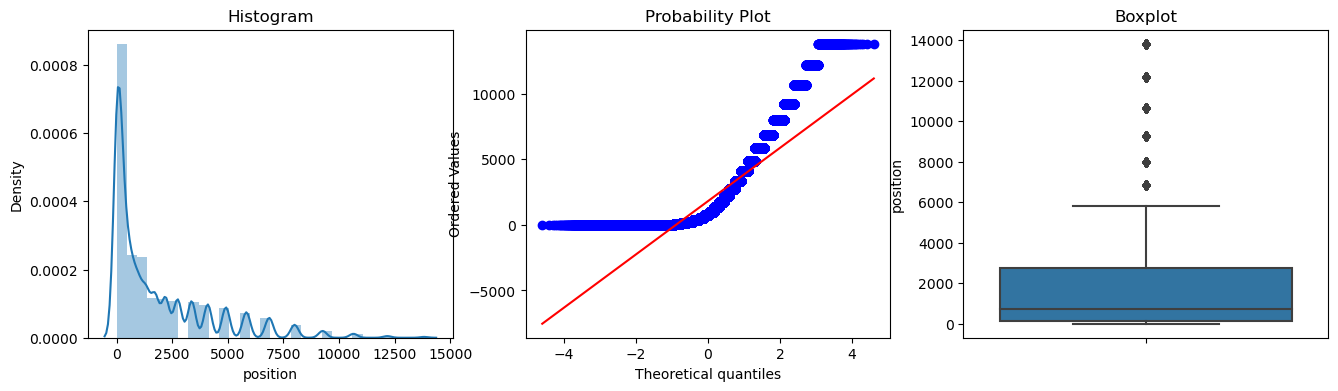

round


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


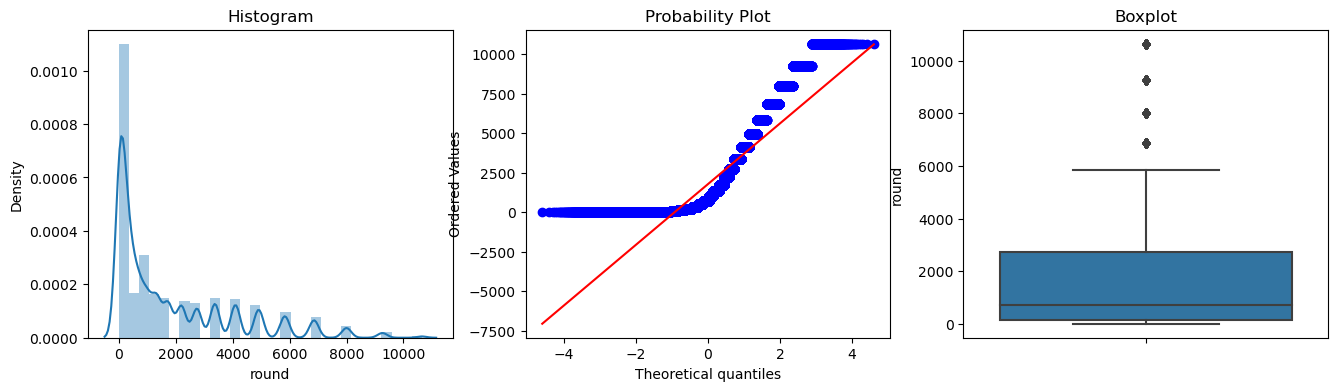

alt


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


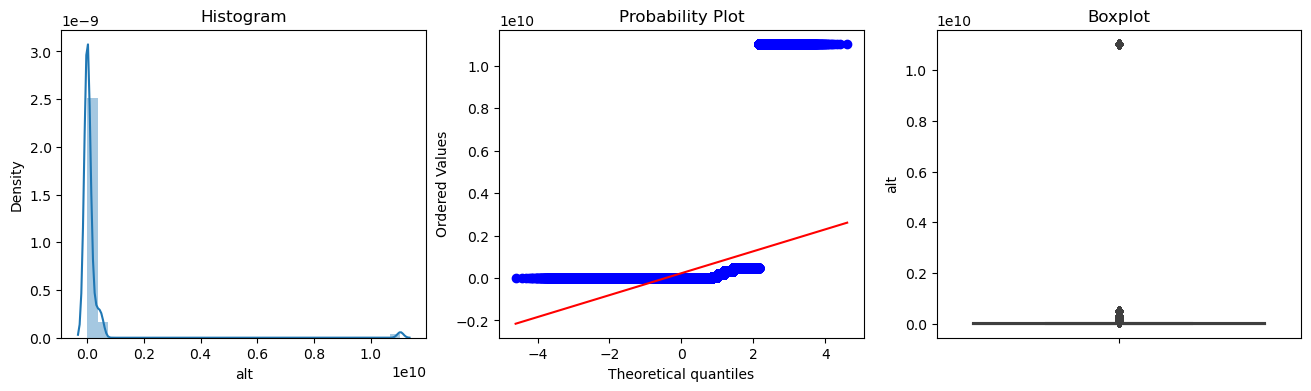

Age


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


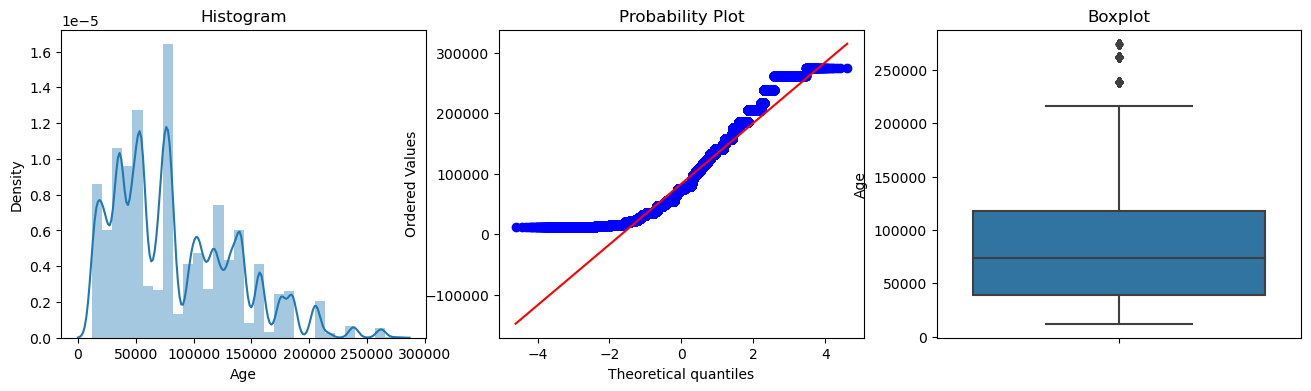

quarter


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


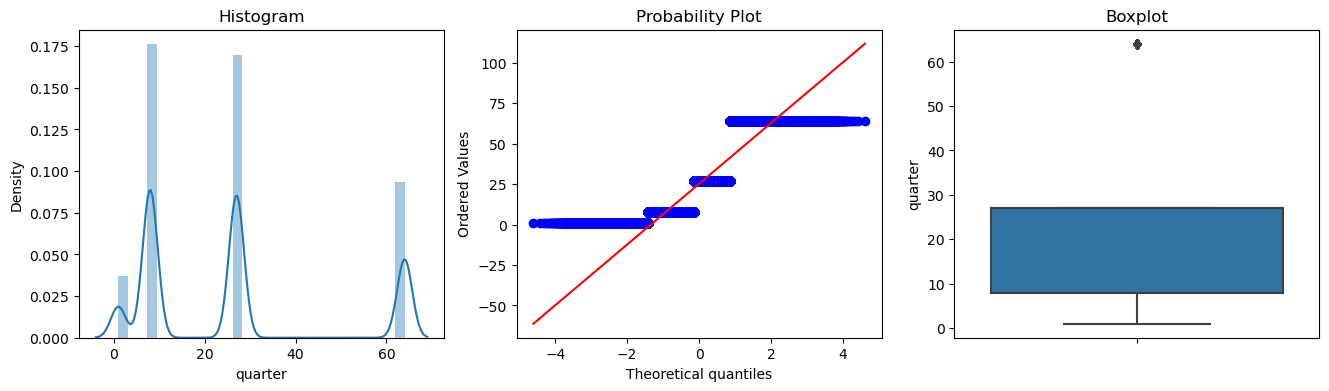

In [74]:
for numV in num_cols:
    print(numV)
    diagnostic_plots(X_train_et2, numV)

In [75]:
# Yeo-Johnson transformation
yjt = YeoJohnsonTransformer(variables = num_cols)

yjt.fit(X_train)

X_train_yjt = yjt.transform(X_train)
X_test_yjt = yjt.transform(X_test)

lap


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


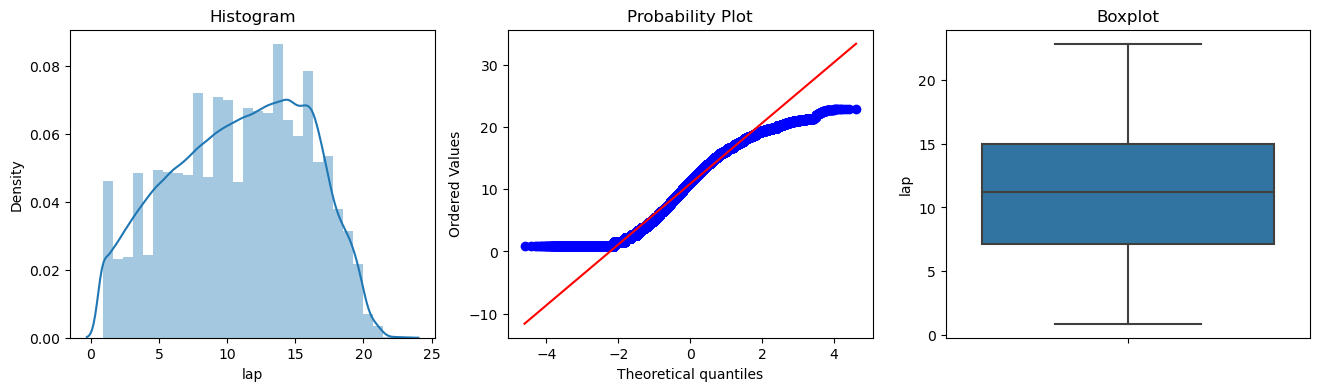

position


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


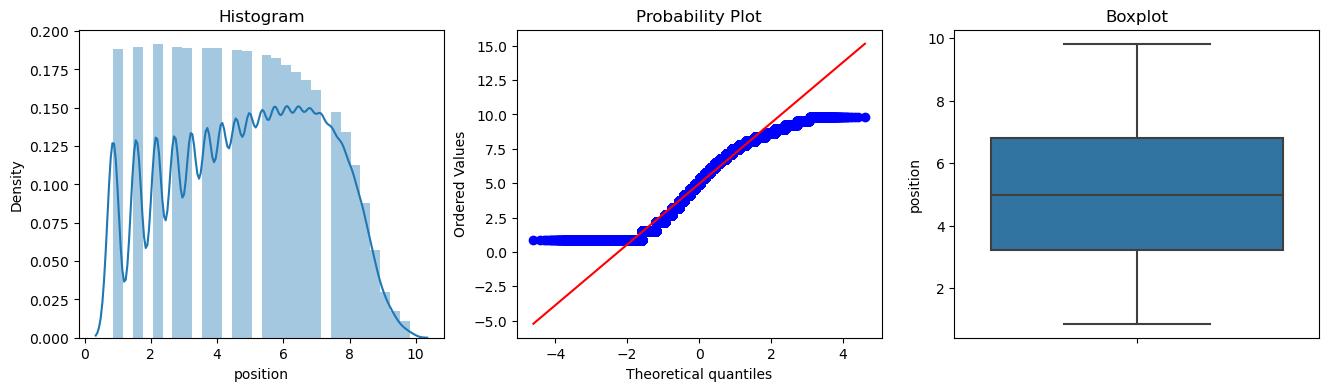

round


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


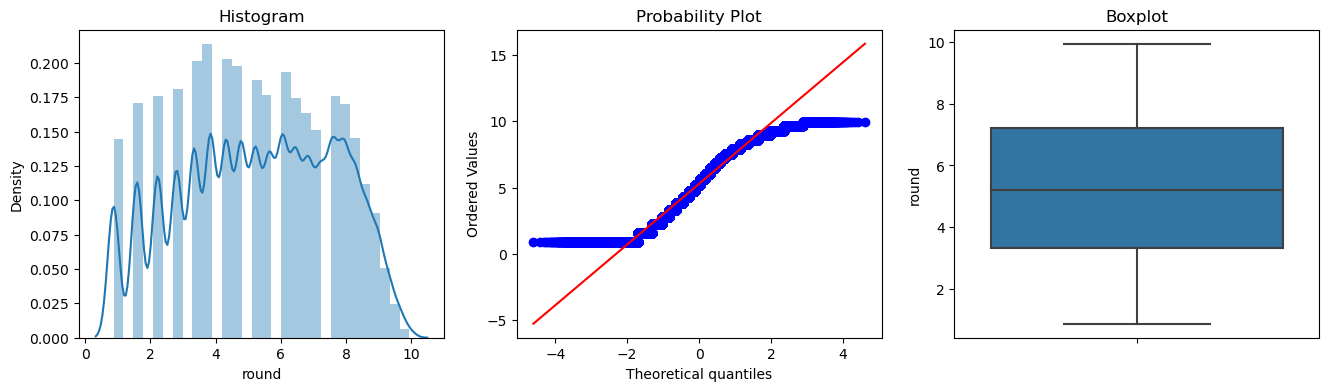

alt


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


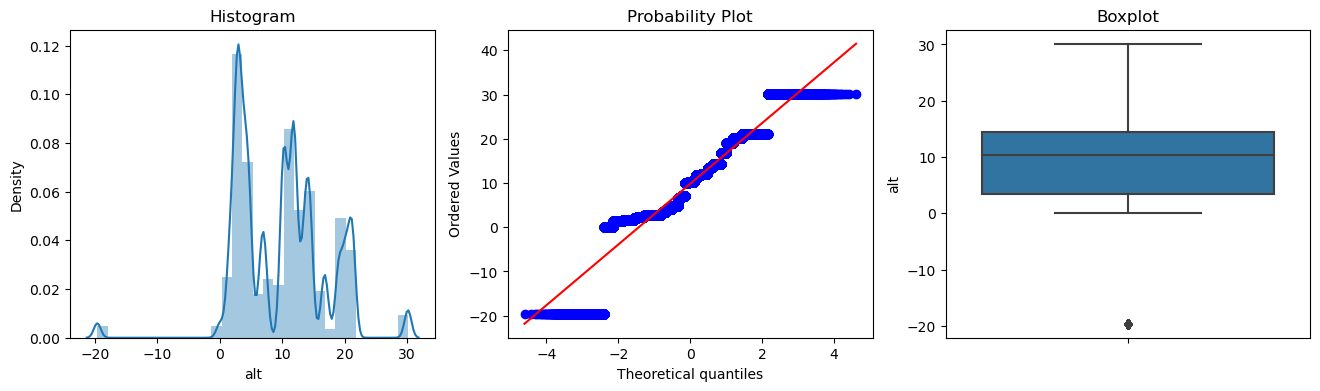

Age


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


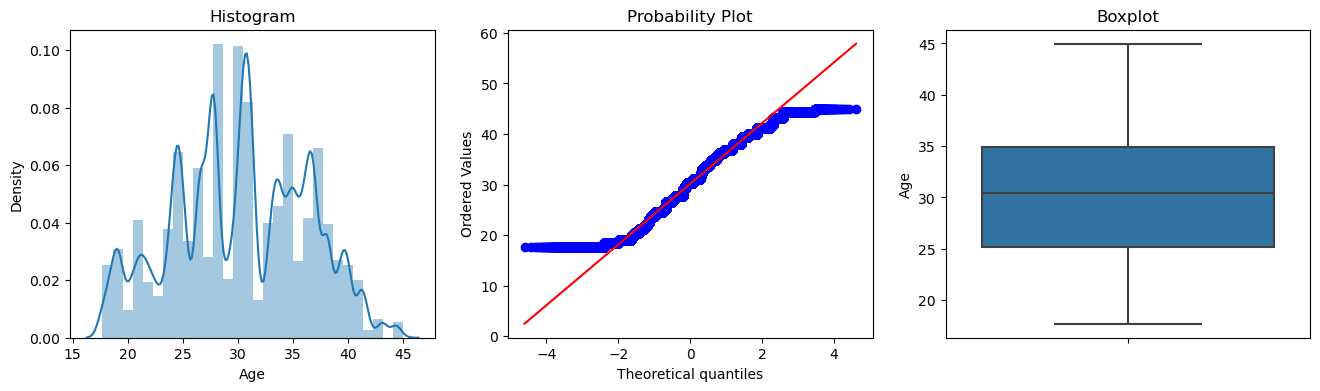

quarter


C:\Users\jaden\AppData\Local\Temp\ipykernel_24680\1954106923.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=30)


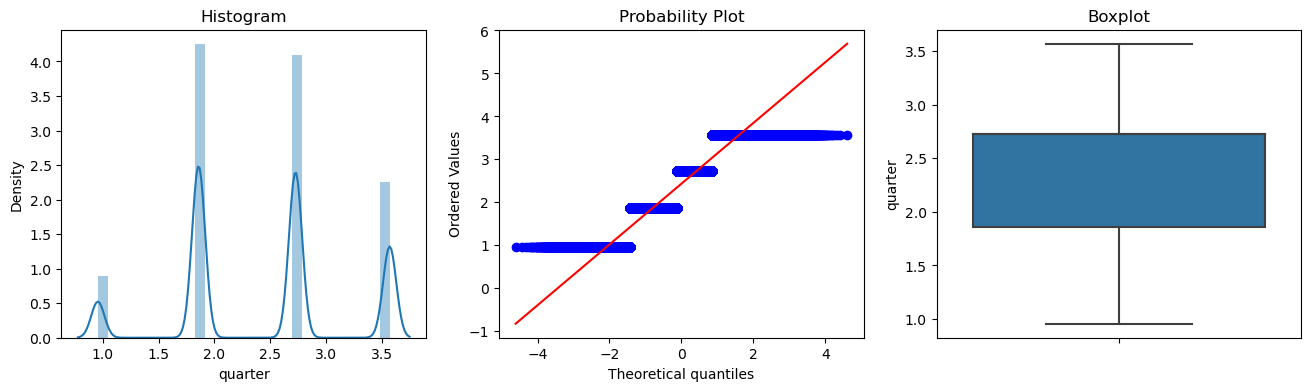

In [76]:
for numV in num_cols:
    print(numV)
    diagnostic_plots(X_train_yjt, numV)

In [77]:
# After the trial and error of using Power Transformer of 2 and 3 and the Yeo-Johnson Transformer, the transformation that 
# resulted in the best result was the Yeo-Johnson Transformer
# Let us use the Yeo-Johnson Transformation
X_train = X_train_yjt
X_test = X_test_yjt

### Step 3.6: Variable Binning/ Discretization <a id="3.6"></a>
[Back to Navigation](#topNav)

In [78]:
num_cols

['lap', 'position', 'round', 'alt', 'Age', 'quarter']

In [79]:
# Let us check the unique values and decide whether we should bin these values or not
X_train[num_cols].nunique()

lap         87
position    24
round       22
alt         35
Age         39
quarter      4
dtype: int64

In [80]:
# After deciding, we shall use 'position' so we can differentiate those in the higher rankings and those in the lower rankings
# And 'alt' to differentiate which altitudes are high or low altitude
# We will not use lap as we want to keep count of the laps to gives us more insight
# We will not use round since it is discrete 
# We will not use quarter since there is nothing to bin as it is binned to its own quarter
# We will also not use Age to retain their individual ages
# We will bin them into 5 bins to categorize and differentiate high and low ranking positions and high and low altitudes

disc_var = ['position', 'alt']

In [81]:
# Using Equal Frequency Discretiser
disc = EqualFrequencyDiscretiser(
    q=5, variables = disc_var)

disc.fit(X_train)

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [82]:
# Using Equal Frequency Discretiser and categorical encoding
disc2 = EqualFrequencyDiscretiser(
    q=5, variables = disc_var, return_object=True)

disc2.fit(X_train)

train_t2 = disc2.transform(X_train)
test_t2 = disc2.transform(X_test)

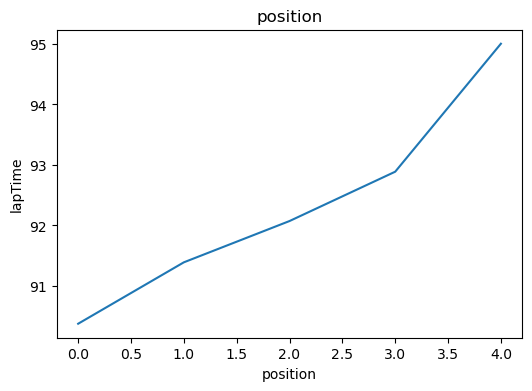

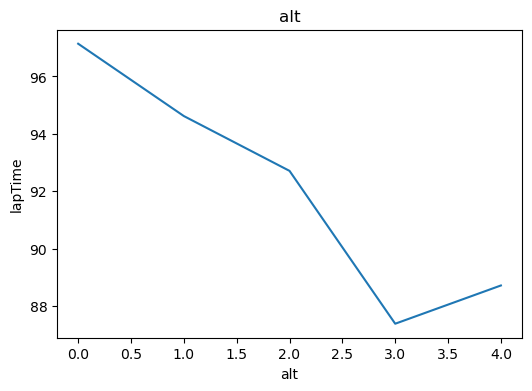

In [83]:
def line_chart(var, trainSet):
    plt.figure(figsize=(6, 4))
    pd.concat([trainSet, y_train], axis=1).groupby(var)['lapTime'].mean().plot()
    plt.title(var)
    plt.ylabel('lapTime')
    
for var in disc_var:
    line_chart(var, train_t2)

In [84]:
# let's order the bins

enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t2, y_train)

train_t2 = enc.transform(train_t2)
test_t2 = enc.transform(test_t2)

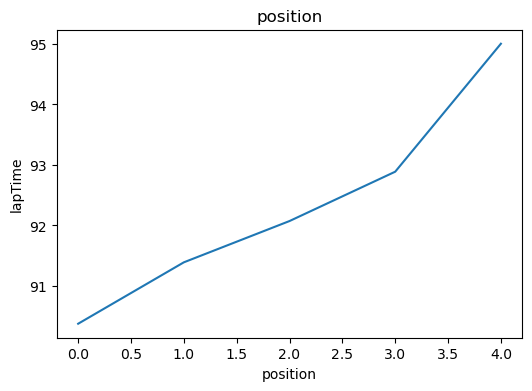

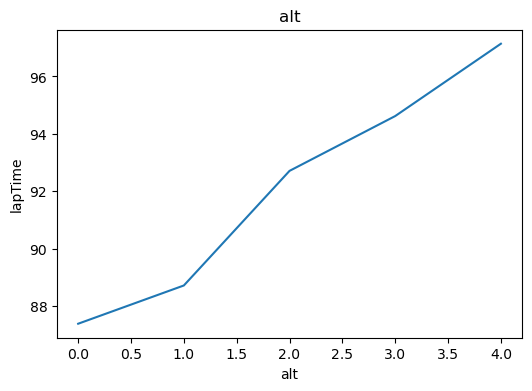

In [85]:
for var in disc_var:
    line_chart(var, train_t2)

In [86]:
# Using Equal Width Discretiser
disc_EW = EqualWidthDiscretiser(bins=5, variables = disc_var)

disc_EW.fit(X_train)

train_t3 = disc_EW.transform(X_train)
test_t3 = disc_EW.transform(X_test)

In [87]:
# After trial and error of using Equal Frequency Discretiser, Equal Frequency Discretiser and categorical encoding, and 
# Equal Width Discretiser
# The discretiser that gave us the best result is the Equal Width Discretiser
# We will use Equal Width Discretiser
X_train = train_t3
X_test = test_t3

### Step 3.7: Feature Scaling <a id="3.7"></a>
[Back to Navigation](#topNav)

In [88]:
# Let us perform some scaling techniques for variables to be in the same range
# We will try Standard Scaling, Mean Scaling, Min Max Scaling, Max Absolute Scaling/ w centering, and Robust Scaling
# We will use the numerical variables from num_cols to view the results of scaling

# using Standard Scaling
scaler_S = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_S.fit(X_train)

# transform train and test sets
X_train_S = scaler_S.transform(X_train)
X_test_S = scaler_S.transform(X_test)

In [89]:
X_train_S = pd.DataFrame(X_train_S, columns = X_train.columns)
X_test_S = pd.DataFrame(X_test_S, columns = X_train.columns)

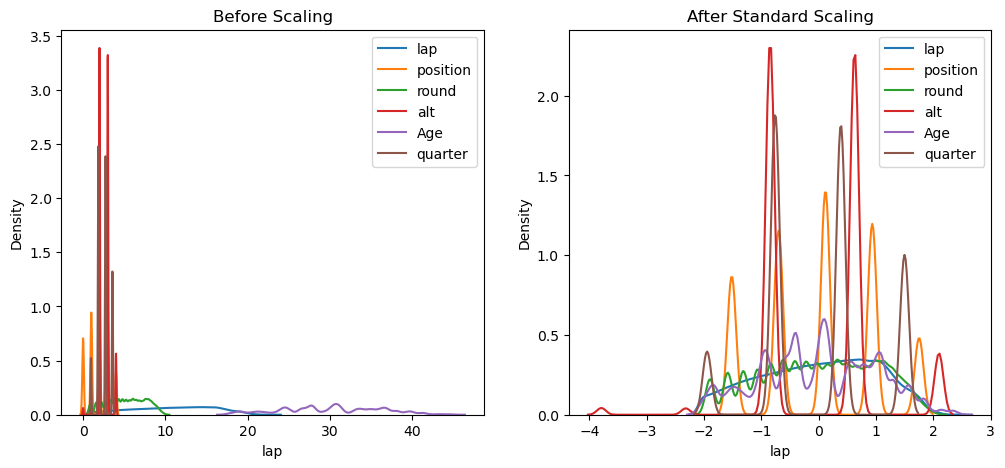

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in num_cols:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Standard Scaling')
for labels in num_cols:
    sns.kdeplot(X_train_S[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [91]:
# using Mean Scaling

# Let us find the mean
means = X_train.mean(axis=0)

# Let us find the range
ranges = X_train.max(axis=0)-X_train.min(axis=0)

# Perform Mean Scaling
X_train_M = (X_train-means)/ranges
X_test_M = (X_test-means)/ranges

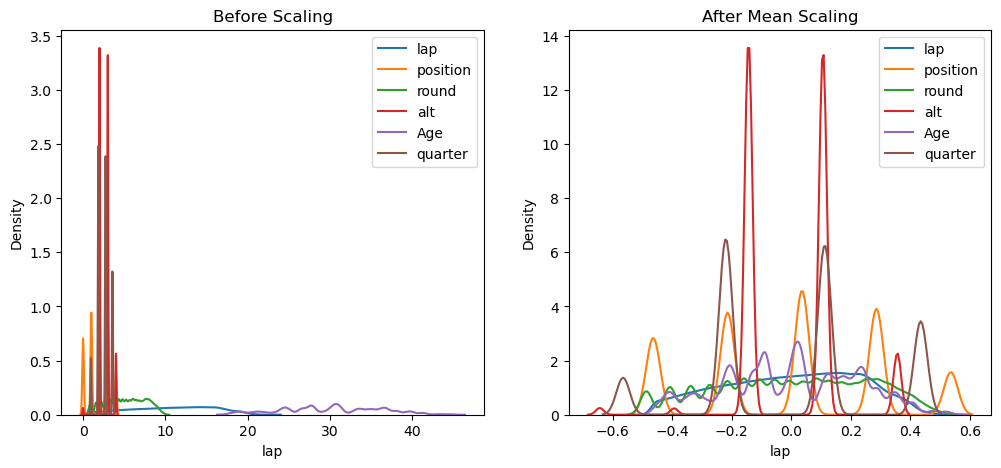

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in num_cols:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Mean Scaling')
for labels in num_cols:
    sns.kdeplot(X_train_M[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [93]:
#Using Mix Max Scaling
scaler_MMS = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_MMS.fit(X_train)

# transform train and test sets
X_train_MMS = scaler_MMS.transform(X_train)
X_test_MMS = scaler_MMS.transform(X_test)

In [94]:
X_train_MMS = pd.DataFrame(X_train_MMS, columns = X_train.columns)
X_test_MMS = pd.DataFrame(X_test_MMS, columns = X_train.columns)

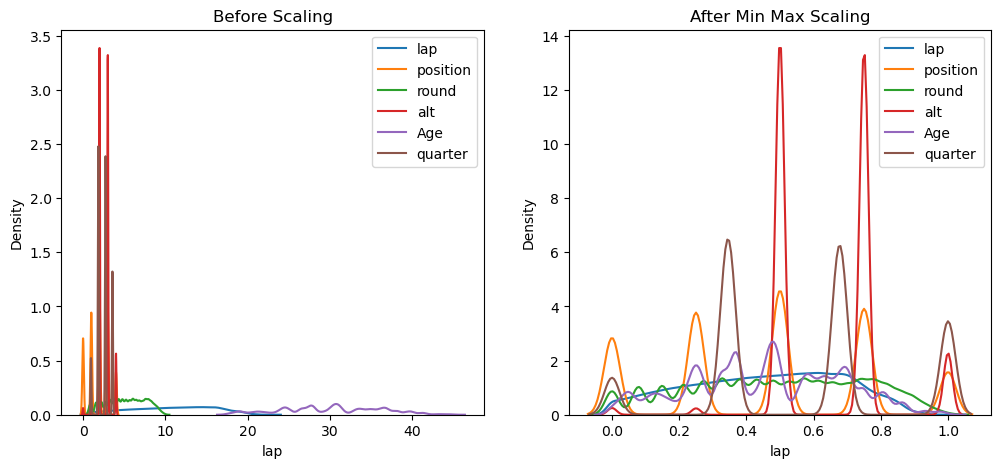

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in num_cols:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Min Max Scaling')
for labels in num_cols:
    sns.kdeplot(X_train_MMS[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [96]:
# Using Maximum Absoulte Scaling
scaler_MAS = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_MAS.fit(X_train)

# transform train and test sets
X_train_MAS = scaler_MAS.transform(X_train)
X_test_MAS = scaler_MAS.transform(X_test)

In [97]:
X_train_MAS = pd.DataFrame(X_train_MAS, columns = X_train.columns)
X_test_MAS = pd.DataFrame(X_test_MAS, columns = X_train.columns)

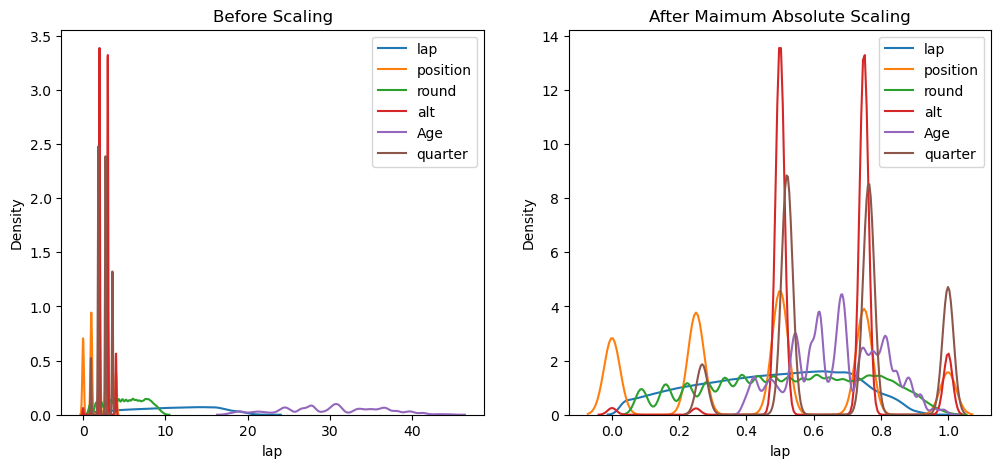

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in num_cols:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Maimum Absolute Scaling')
for labels in num_cols:
    sns.kdeplot(X_train_MAS[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [99]:
# Using Maximum Absoulte Scaling and Centering
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# transform train and test sets
X_train_MASC = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_MASC = scaler_maxabs.transform(scaler_mean.transform(X_test))

C:\Users\jaden\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(
C:\Users\jaden\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


In [100]:
X_train_MASC = pd.DataFrame(X_train_MASC, columns = X_train.columns)
X_test_MASC = pd.DataFrame(X_test_MASC, columns = X_train.columns)

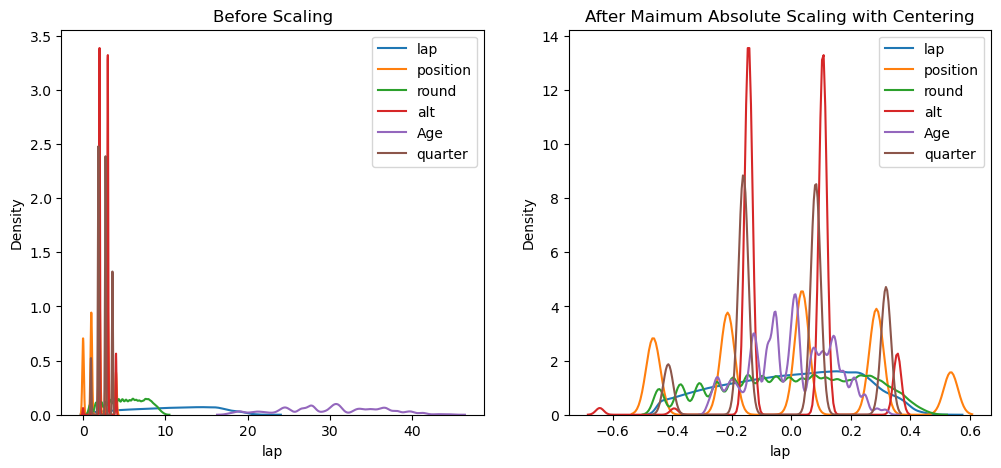

In [101]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in num_cols:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Maimum Absolute Scaling with Centering')
for labels in num_cols:
    sns.kdeplot(X_train_MASC[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [102]:
# Using Robust Scaling
scaler_R = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_R.fit(X_train)

# transform train and test sets
X_train_R = scaler_R.transform(X_train)
X_test_R = scaler_R.transform(X_test)

In [103]:
X_train_R = pd.DataFrame(X_train_R, columns = X_train.columns)
X_test_R = pd.DataFrame(X_test_R, columns = X_train.columns)

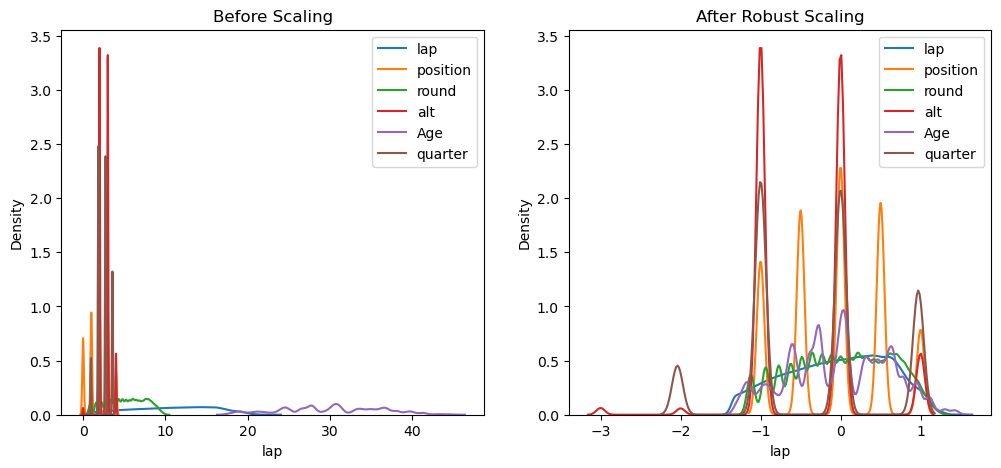

In [104]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in num_cols:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Robust Scaling')
for labels in num_cols:
    sns.kdeplot(X_train_R[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [105]:
# After trial and error of using Standard Scaling, Mean Scaling, Min Max Scaling, Max Absolute Scaling/ w centering,
# and Robust Scaling. The scaler that gave the best result was Robust Scaling
# Let us use Robust Scaling
X_train = X_train_R
X_test = X_test_R

### Step 3.8: Features Computation <a id="3.8"></a>
[Back to Navigation](#topNav)

In [106]:
# We will use PCA to reduce our dimension followed by Polynomial Expansion to find the hidden relationships of the PCs

# We will not remove 5% of the data as it might lead to loss of information
# and it worsen the results
pca = PCA()

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [107]:
X_train = X_train_pca
X_test = X_test_pca

In [108]:
# Next we will use Polynomial Expansion to capture complex relationships of the PCs
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [109]:
X_train = X_train_poly
X_test = X_test_poly

In [110]:
# Finally we will scale down the polynomial expansion to ensure that the features are on the same scale
scaler_S = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_S.fit(X_train)

# transform train and test sets
X_train = scaler_S.transform(X_train)
X_test = scaler_S.transform(X_test)

## Step 4: Machine Learning Modelling <a id="4"></a>
[Back to Navigation](#topNav)

In [111]:
# Importing functions for the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [112]:
# Importing the final dataset
X_train_final = X_train
X_test_final = X_test

y_train_final = y_train
y_test_final = y_test

In [113]:
# To show that my predictions are not trivial nor unrealistic, we will be checking the shape of our final dataset
X_train_final.shape, X_test_final.shape

((342787, 164), (146910, 164))

### Naive Baseline Model for Regression

In [114]:
# We will be using the One Hot Encoded X_train and X_test for this machine learning model
# We will be using the pre-defined One Hot Encoded X_train and X_test from the above
X_train_ohe.shape, X_test_ohe.shape

((342787, 27), (146910, 27))

In [115]:
# Checking that the OHE columns are aligned for both Train and Test Datasets
list(X_train_ohe.columns) == list(X_test_ohe.columns)

True

In [116]:
print(y_train_final.mean())

mean_target_value = y_train_final.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

92.22305948883708
The train mean target value is 92.22.


In [117]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_ohe.iloc[:,0]]
y_train_preds_naive[0:5]

[92.22, 92.22, 92.22, 92.22, 92.22]

In [118]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_ohe.iloc[:,0]]
y_test_preds_naive[0:5]

[92.22, 92.22, 92.22, 92.22, 92.22]

In [119]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# Mean Absolute Error (the lower the better, 0 is best possible score)

# train MAE score
y_true = y_train
y_pred = y_train_preds_naive

train_mae_naive = mean_absolute_error(y_true, y_pred)
print(f"The Naive Baseline Model's MAE on train data is {train_mae_naive:.2f}.")

# test MAE score
y_true = y_test
y_pred = y_test_preds_naive

test_mae_naive = mean_absolute_error(y_true, y_pred)
print(f"The Naive Baseline Model's MAE on test data is {test_mae_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 173.84.
The Naive Baseline Model's MSE on test data is 173.86.

The Naive Baseline Model's RMSE on train data is 13.18.
The Naive Baseline Model's RMSE on test data is 13.19.

The Naive Baseline Model's MAE on train data is 10.91.
The Naive Baseline Model's MAE on test data is 10.91.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


### Linear Regression Model

In [120]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Squared Error (MSE)
# The lower MSE, the better the model performance
print('train_MSE:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_MSE:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))
print()

# Evaluate the Linear Regression Model using Root Mean Squared Error (RMSE)
# if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1
print('train_RMSE:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final), squared=False), 
      '\n test_RMSE:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final), squared=False))
print()

# Evaluate the Linear Regression Model using Mean Absolute Error (MAE)
# The lower MAE, the better the model performance
print('train_MAE:', mean_absolute_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_MAE:', mean_absolute_error(y_test_final, model_linear_regression.predict(X_test_final)))
print()

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_R2:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_R2:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))


train_MSE: 63.30315114199493 
 test_MSE: 63.52018582747223

train_RMSE: 7.9563277422435865 
 test_RMSE: 7.969955196076841

train_MAE: 5.049279096118494 
 test_MAE: 5.060531808642889

train_R2: 0.6358615044067675 
 test_R2: 0.6346520903035631


## Report <a id="5"></a>
[Back to Navigation](#topNav)

### Table of Contents<a id="top"></a>
#### 1. [Introduction with Value Based Problem Statement](#part1)

#### 2. [Problem Formulation](#part2)

#### 3. [Data Wrangling on multiple tables](#part3)

#### 4. [Data Cleansing and Transformation](#part4)

#### 5. [Machine Learning Model](#part5)

#### 6. [Summary and Further Improvements](#part6)

## 1. Introduction with Value Based Problem Statement <a id="part1"></a>
[Back to Content](#top)

In this assignment, we are given 13 different datasets from a database of Formula 1 races, starting from the 1950 season until today. The dataset includes information such as the different lap times of each driver, the results of the races, the performance in the qualifying rounds etc. of all Formula 1 races. Our task at hand is to explore the data, understand the data, and formulate a prediction problem. The goal of this assignment is to build a naive baseline model and a simple machine learning model, in hopes to optimize the different Formula 1 teams' racing strategy with the past data at hand.

We will begin this assignment with formulating the prediction problem using the TIBCO Spotfire Analyst. Followed by performing data cleansing and transformation which includes: Outliers removal/ capping, missing value imputation, categorical data encoding, numerical data transformation, variable binning/ discretization, feature scaling, and features computation. We will be using the different libraries and techniques to complete the data cleansing and transformation. Once we have completed data cleansing and transformation, we will then pass in the data to two machine learning models. First being the naive baseline model using the mean of the Train Target Value and a simple Linear Regression Model. To test both of these models, we will use Mean Square Error (MSE), Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and R2 to identify how effective and accurate the model is.

At the end of this assignment, we will summarize the assignment experience and give further improvements on how we could have increased the effectiveness and accuracy of the two machine learning models.

## 2. Problem Formulation <a id="part2"></a>
[Back to Content](#top)

For us to formulate a prediction problem, first we have to look at the 13 given datasets. Upon viewing at all 13 different datasets, the most useful target variable for Formula 1 teams to optimize their racing strategy is to predict the lap times of their drivers each lap. Hence, we will start off by using the 'lap_times' table with the target variable being the lap time in milliseconds. To get more features for our machine learning model, we are also going to be using three more tables which are 'circuits', 'drivers', and 'races' since they each share a primary and foreign key to connect to the 'lap_times' table. We will be using inner-joins for all the four tables on their respective primary and foreign key. Hence, the prediction problem formulated is "To identify patterns and trends of past race lap time to help build a predictive model to predict the lap time of each F1 driver in their upcoming races and help optimize their race strategy".

For Exploratory Data Analysis (EDA), we will be using TIBCO Spotfire Analyst. Using TIBCO Spotfire Analyst, we have identified the features which are more important as they do show a relationship with our target variable, lap time in milliseconds. The thing we explored is the outliers among our target variable. Which in this case, there are huge outliers that lies in our target variable. The next feature we explore is whether different circuits affect our target variable, where it shows that it does, this may be due to some circuits having a longer circuit length than others, causing the target variable to be higher. After that, we checked the relationship between the lap and the target variable. The relationship shows a negative correlation where it can be implied that as the driver moves on to a higher lap, their lap time gets shorter. We also looked into the relationship of the altitude and whether it affects the drivers. Which in this case, it affects the lap time by a bit. Moreover, we also identified that age of the driver affects the lap times by a bit, which might due to the experience and skill of the driver. 

Hence, we will be using the four different tables to build a predictive model to predict the lap time of each F1 driver to help them optimize their racing strategy, be it improving pit stops or their training regime. 

## 3. Data Wrangling on multiple tables <a id="part3"></a>
[Back to Content](#top)

We will wrangle on the four selected tables selected earlier that relates to our target variable. With the datasets imported, we use the merge function to join all four tables together. First we merge 'lap_times' table with 'drivers' on 'driverId' with an inner join. Similarly, we used the merged tables of lap_times and drivers to merge with 'races' table on 'raceId' with an inner join. Lastly, using the three merged tables to merge with 'circuits' on 'circuitsId' with an inner join. Next, using our knowledge from data exploration with TIBCO Spotfire Analyst, we will be using these variables and omitting the rest: 'lap', 'position', 'milliseconds', 'forename', 'surname', 'dob', 'date', 'round', 'name_y', 'alt'.

Now we will create new features and clean the dataset. First we will create a calculated feature 'lapTime', lap time in seconds, which will be our target variable and is calculated by 'milliseconds' divided by 1000. Next, we will combine the forename and surname of the drivers to better uniquely identify them from their whole name, and we will call this feature 'driver_name'. The next feature we are going to calculate is the age of the drivers, which uses the 'dob' feature and convert it into a datetime type to calculate the current date minus the 'dob' to achieve the drivers' age. We will also rename the column 'name_y' to 'circuit_name' for a clearer understanding of what the column is about. 

Next, we will check the unique values of all features to check if there are errors that lie within the dataset. The first error encountered is a value '\\N' being present in two features, we will then replace these values with the null value. The second error encountered is values such as '9/16/12018' and '9/4/12005' being present in the 'date' column, we will replace these values with the help of the regular expression to remove the 1/5th digit in the year of the date values. Once the values are cleaned, we will extract the quarter from the 'date' column. However, there are null values in the quarter since some of the date values were null. Hence, we will omit these values by dropping those rows as they only contain 10,680 rows while we have 500,000 rows. Lastly, we will convert the quarter to an integer data type and drop the following columns as they have a calculated column that performs the same or even better: 'forename', 'surname', 'milliseconds', 'date', 'dob'.

The final dataset we are left with 503912 rows of data and 8 columns.

## 4. Data Cleansing and Transformation <a id="part4"></a>
[Back to Content](#top)

Data Cleansing and Transformation will help prepare and optimize our data to be processed into the machine learning model since the machine learning model is unable to process words and is unable to handle null values. Hence the steps taken will help with that.

#### Outliers Removal/ Capping

For Outliers, we identified that only two variables contain outliers, these variables are 'alt' and 'lapTime'. Using domain knowledge, we will not remove or cap the outliers of 'alt' as those are stats which have a higher value than the other. As one of the circuits have an altitude of more than 2000, while the second highest altitude being 800. However, we use trimming to remove the outliers of 'lapTime' as we identified that some of the values are very high and the cause of these outliers are due to mis-inputs. Upon checking some of the rows and checking the official F1 website, those drivers were said to be DNC or DNF. Hence, those are the cause of the high lapTime of over 500 since the timer was not stopped after sometime. Furthermore, the number of rows of outliers were only 14,215 when compared to our dataset of 503,912 rows.

#### Missing Value Imputation

For Missing values, we have identified that 'alt' is the only column which contained a null value. Hence, by finding which circuit/s is it, we can source online to find the altitude of the circuit/s. There is only one circuit which contained the null 'alt', which is 'Losail International Circuit' located in the country of Bahrain. We identified that the altitude of the 'Losail International Circuit' is 46 FT/ 14m from a reddit post and proceeded to use arbitrary number imputer to replace all the null values to 14 since the circuits are all for 'Losail International Circuit'.

#### Categorical Data Encoding

This is an important step for the data transformation as it transforms the categorical data in a way that it has numbers for the machine learning model to process. We use different categorical encoders such as rare lablel category, one-hot, ordinal, count or frequency, ordered ordinal, and target mean encoders. For one-hot encoding, the top_categories were set to 20 since viewing the distribution of the values of the variables did not seem to be clustered at the top and was distributed continuously. After trial and errors of combining the rare label categories and the other encoders and solely using the individual encoders, the results that gave the best results was from using Rare Label category first followed by Target Mean Encoder. Therefore, the final X_train and X_test used Rare Label category first followed by Target Mean Encoder

#### Numerical Data Transformation

Numerical Data Transformation will help fix skewed features and normalize the data as seen on the diagnostics plots above. There are a few different numerical data transformation techniques to be used, which are: Power and Yeo-Johnson transformation. The reason why Logarithm, Reciprocal, Square-root, Cube-root, and Box-Cox transformation cannot be used is due to values of 0 and negative values being present in some features. After trial and error and using the Power of 2 and 3 and Yeo-Johnson transformation, the numerical data transformation technique that gave the best results were the Yeo-Johnson transformation. Hence, for the final dataset, we will be using the Yeo-Johnson transformation to normalize our numerical features of the dataset.

#### Variable Binning/ Discretization

Variable Binning/ Discretization groups continuous variables and categorize them into discrete bins. This will help make it easier to analyze, interpret, and be processed in the model. The chosen variables for discretization are 'position' and 'alt' so we can differentiate those in the higher rankings and those in the lower rankings and differentiate which altitudes are high or low. The other reasons for not choosing the other variables are due to wanting to keep count of the 'lap' number, 'quarter' and 'round' being discrete, and retain drivers' individual 'Age'. The number of bins chosen is 5 since it is not too high and gets a better results from the model as compared to 3 bins. The different discretization techniques are: Equal Frequency Discretiser, Equal Frequency Discretiser and categorical encoding, and Equal Width Discretiser. After trial and error, the best discretiser technique that gave the best results were Equal Width Discretiser. Hence, we will be using the Equal Width Discretiser of 5 bins to categorize 'position' and 'alt' of our dataset.

#### Feature Scaling

This is also an important step before processing the dataset to the machine learning model. Since the machine learning model does not understand the different scale of the different features, we should scale all features on the same scale. This will help prevent some features from overshadowing others just because they have larger values. Some of the scaling techniques used are: Standard Scaling, Mean Scaling, Min Max Scaling, Max Absolute Scaling/ w centering, and Robust Scaling. After trial and error, the scaler that gave the best results were Robust Scaler. Hence, we will scale all our features using Robust Scaling for our final dataset.

#### Features Computation

For Features Computation, we are going to use PCA and Polynomial Expansion. For PCA, the best results yielded was by not removing the rare 5% of the principal component. For Polynomial Expansion, the best results based on degree is 3, with it not being too high as to cause overfitting to the model. After trial and error, by using the PCA first followed by performing Polynomial Expansion, the resulted in the best results for the machine learning model. To end it off, we use a standard scaler to scale down the features of higher powers to the same scale. This is due to the machine learning model being sensitive to the different scales. Hence, all features should be scaled down to the same scale.

## 5. Machine Learning Model <a id="part5"></a>
[Back to Content](#top)

For these part, we will be using regression and use these two machine learning models: Naive Baseline Model using the mean of Train Target Value and a Linear Regression Model. Before processing the dataset to the model, the final shape of the X_train and X_test are (342787, 27) and (146910, 27) respectively. This ensures that the predictions are not trivial nor unrealistic due to the large number of rows. To test the accuracy of these models, we will be using the Mean Square Error (MSE), Root Mean Square Error (RMSE), and R2 to test the Naive Baseline model and Mean Absolute Error (MAE), Mean Square Error (MSE), and R2 to test the Linear Regression Model.


#### Naive Baseline Model

The Naive Baseline Model serves as the comparison of how the Linear Regression Model's result should output. The Naive Baseline Model uses the mean of the y_train for all instances. Which means that the X_train and X_test do not affect the results of this model. Looking at the results below, we see that the MSE, MAE and RMSE are somewhat decent since closer to 0 would be perfect score, with the R2 score being close to 0. Hence, This means that the naive baseline model suggests that the model isn't learning any patterns or relationships from the data. Hence, by building another machine learning model such as the Linear Regression Model, we are then able to compare the results between the MSE, RMSE, and R2.

#### Results for Naive Baseline Model

The Naive Baseline Model's MSE on train data is 173.84.<br> 
The Naive Baseline Model's MSE on test data is 173.86.

The Naive Baseline Model's RMSE on train data is 13.18.<br> 
The Naive Baseline Model's RMSE on test data is 13.19.

The Naive Baseline Model's MAE on train data is 10.91.<br> 
The Naive Baseline Model's MAE on test data is 10.91.

The Naive Baseline Model's R2 on train data is -0.00.<br> 
The Naive Baseline Model's R2 on test data is -0.00.


#### Linear Regression Model

The Linear Regression Model is a machine learning model that aims to find the best-fitting linear relationship between added features and the target variable. With the results below, we can compare them to the results of the Naive Baseline Model to show how the added features help to make the model more accurate. From the MSE, RMSE, and MAE, we see that all of their values are more than halved as compared to the MSE, RMSE, and MAE of the Naive Baseline model. Furthermore, comparing the R2 results of the Linear Regression Model and the Naive Baseline, we see that the R2 score is average as it has a value of 0.63 and is closer to 1. Hence, the added features that are cleaned and transformed helped tremendously in making the Linear Regression Model more accurate.

#### Results for Linear Regression Model

train_MSE: 63.30315114199493 <br> 
test_MSE: 63.52018582747223

train_RMSE: 7.9563277422435865 <br> 
test_RMSE: 7.969955196076841

train_MAE: 5.049279096118494 <br> 
test_MAE: 5.060531808642889

train_R2: 0.6358615044067675 <br> 
test_R2: 0.6346520903035631

## 6. Summary and Further Improvements <a id="part6"></a>
[Back to Content](#top)

To conclude, we have explored the different datasets of F1 using TIBCO Spotfire Analyst and came up with a prediction problem which is to predict the lap time of each F1 driver in their upcoming races and help optimize their race strategy. Moreover, we have went through the selection of the tables and the cleaning and transformation of the data using the different techniques to be processed into the machine learning model. And using the results of the Naive Baseline Model and Linear Regression Model showed us how much the added features helped with the results and how it improves the accuracy of the model to predict the individual lap times.

For further improvements to be made, we could have tried the average lap time since it is an easier target variable for our problem prediction and will eventually give us similar results. Furthermore, average lap time will help omit the values that were keyed in wrongly which caused many outliers for 'lapTime', with some lap times reaching 700s or more, which does not make sense. Hence, by using average lap time, it will give us a more rough estimate of the predicted lap times to better optimize the driver's racing strategy.